### Imports

In [ ]:
import sys
from pathlib import Path
import importlib.util
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
from kedro_datasets.pandas.csv_dataset import CSVDataset
from kedro.framework.project import configure_project
from kedro.framework.session import KedroSession
import random
from scipy.stats import chi2_contingency


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:12                                                                                   │
│                                                                                                  │
│    9 from kedro.framework.session import KedroSession                                            │
│   10 import random                                                                               │
│   11 from scipy.stats import chi2_contingency                                                    │
│ ❱ 12 import ace_tools as tools;                                                                  │
│   13                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'ace_tools'

### Setze scr_path des Kedro Projets

In [2]:
# src-Pfad bestimmen (Jupyter: Path.cwd() → /workspace/scaniakedro/notebooks)
project_root = Path.cwd().parents[0]  # /workspace/scaniakedro
src_path = project_root / "src"
print("src_path:", src_path)
print("src_path exists:", src_path.exists())

# src GANZ OBEN ins sys.path einfügen
if str(src_path) != sys.path[0]:
    sys.path.insert(0, str(src_path))

print("sys.path[0]:", sys.path[0])
print("Findet scaniakedro:", importlib.util.find_spec("scaniakedro") is not None)


src_path: /workspace/scaniakedro/src
src_path exists: True
sys.path[0]: /workspace/scaniakedro/src
Findet scaniakedro: True


### raw_date_loading Pipeline ausführen

In [3]:
configure_project("scaniakedro")

with KedroSession.create() as session:
    context = session.load_context()
    run_result = session.run(pipeline_name="raw_data_loading")
    print(run_result)
    print("Catalog datasets:", context.catalog.list())
    raw_data = run_result["raw_datasets"]  # <-- direkt aus dem Pipeline-Output!
    print(raw_data)

[07/23/25 05:06:02] INFO     Kedro project scaniakedro                                               ]8;id=731146;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/session/session.py\session.py]8;;\:]8;id=571068;file:///usr/local/lib/python3.12/dist-packages/kedro/framework/session/session.py#329\329]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=395811;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=266872;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Using synchronous mode for loading and saving data. Use the    ]8;id=959921;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/sequential_runner.py\sequential_runner.py]8;;\:]8;id=928328;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/sequential_runner.py#68\68]8;;\
                             --async flag for potential performance gains.                                         
                             https://docs.kedro.org/en/stable/nodes_and_pipelines/run_a_pip                        
                             eline.html#load-and-save-asynchronously                                               

                    INFO     Loading data from train_specifications (CSVDataset)...             ]8;id=694756;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=170386;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from train_operational_readouts (CSVDataset)...       ]8;id=532378;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=99798;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/23/25 05:06:16] INFO     Loading data from train_tte (CSVDataset)...                        ]8;id=692207;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=931987;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from validation_specifications (CSVDataset)...        ]8;id=606503;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=457811;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from validation_operational_readouts (CSVDataset)...  ]8;id=172359;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=217077;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/23/25 05:06:18] INFO     Loading data from validation_labels (CSVDataset)...                ]8;id=325890;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=271255;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from test_specifications (CSVDataset)...              ]8;id=929048;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=65711;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Loading data from test_operational_readouts (CSVDataset)...        ]8;id=787557;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=692961;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

[07/23/25 05:06:20] INFO     Loading data from test_labels (CSVDataset)...                      ]8;id=642575;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=962045;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

                    INFO     Running node: load_all_raw_data_node: load_all_raw_data() ->               ]8;id=570892;file:///usr/local/lib/python3.12/dist-packages/kedro/pipeline/node.py\node.py]8;;\:]8;id=783808;file:///usr/local/lib/python3.12/dist-packages/kedro/pipeline/node.py#370\370]8;;\

                    INFO     Saving data to raw_datasets (MemoryDataset)...                     ]8;id=666500;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=510002;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#445\445]8;;\

[07/23/25 05:06:21] INFO     Completed node: load_all_raw_data_node                                   ]8;id=14328;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=260055;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#250\250]8;;\

                    INFO     Completed 1 out of 1 tasks                                               ]8;id=717788;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=98030;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#251\251]8;;\

                    INFO     Pipeline execution completed successfully in 18.6 sec.                   ]8;id=39479;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py\runner.py]8;;\:]8;id=300527;file:///usr/local/lib/python3.12/dist-packages/kedro/runner/runner.py#135\135]8;;\

                    INFO     Loading data from raw_datasets (MemoryDataset)...                  ]8;id=596487;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=888504;file:///usr/local/lib/python3.12/dist-packages/kedro/io/data_catalog.py#403\403]8;;\

{'raw_datasets': {'train': {'spec':        vehicle_id Spec_0 Spec_1 Spec_2 Spec_3 Spec_4 Spec_5 Spec_6 Spec_7
0               0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0
1               2   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat0   Cat1
2               3   Cat0   Cat1   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1
3               4   Cat0   Cat0   Cat2   Cat1   Cat0   Cat0   Cat0   Cat1
4               5   Cat0   Cat2   Cat2   Cat0   Cat0   Cat0   Cat0   Cat1
...           ...    ...    ...    ...    ...    ...    ...    ...    ...
23545       33639   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23546       33640   Cat0  Cat14   Cat1   Cat3   Cat0   Cat0   Cat1   Cat4
23547       33641   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23548       33642   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23549       33643   Cat0   Cat0   Cat2   Cat0   Cat0   Cat0   Cat1   Cat4

[23550 rows x 9 columns], 'readouts':          vehicle_id  time_step      1

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=777580;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=32471;file:///usr/local/lib/python3.12/dist-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

Catalog datasets: ['train_specifications', 'train_operational_readouts', 'train_tte', 'validation_specifications', 'validation_operational_readouts', 'validation_labels', 'test_specifications', 'test_operational_readouts', 'test_labels', 'raw_datasets', 'parameters']
{'train': {'spec':        vehicle_id Spec_0 Spec_1 Spec_2 Spec_3 Spec_4 Spec_5 Spec_6 Spec_7
0               0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0   Cat0
1               2   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat0   Cat1
2               3   Cat0   Cat1   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1
3               4   Cat0   Cat0   Cat2   Cat1   Cat0   Cat0   Cat0   Cat1
4               5   Cat0   Cat2   Cat2   Cat0   Cat0   Cat0   Cat0   Cat1
...           ...    ...    ...    ...    ...    ...    ...    ...    ...
23545       33639   Cat0   Cat1   Cat1   Cat0   Cat0   Cat0   Cat1   Cat4
23546       33640   Cat0  Cat14   Cat1   Cat3   Cat0   Cat0   Cat1   Cat4
23547       33641   Cat0   Cat1   Cat1   Cat0  

# Anzeigen der ersten fünf Zeilen der Daten

In [4]:
for key in raw_data.keys():
    print(f"#### Key: {key} ####")
    for dataset_name, dataset in raw_data[key].items():
        print(f"Dataset: {dataset_name}, shape: {dataset.shape}")
        display(dataset.head())  # Display the first few rows of each dataset


#### Key: train ####
Dataset: spec, shape: (23550, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0,Cat0
1,2,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
2,3,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,4,Cat0,Cat0,Cat2,Cat1,Cat0,Cat0,Cat0,Cat1
4,5,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1


Dataset: readouts, shape: (1122452, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,0,11.2,167985.0,10787.0,7413813.0,2296.0,4110.0,1296420.0,1628265.0,630345.0,...,95728.0,15609.0,1984.0,8.0,784.0,150228.0,261904.0,93172.0,17874.0,452.0
1,0,11.4,167985.0,10787.0,7413813.0,2296.0,4111.0,1302855.0,1628265.0,630345.0,...,95729.0,15610.0,1984.0,8.0,784.0,150228.0,261905.0,93172.0,17874.0,452.0
2,0,19.6,331635.0,14525.0,13683604.0,2600.0,NaN,NaN,NaN,NaN,...,142900.0,19263.0,2441.0,12.0,1420.0,204832.0,313485.0,106464.0,19306.0,452.0
3,0,20.2,354975.0,15015.0,14540449.0,2616.0,NaN,NaN,NaN,NaN,...,150565.0,19832.0,2522.0,12.0,1444.0,211688.0,318901.0,107745.0,19406.0,453.0
4,0,21.0,365550.0,15295.0,14966985.0,2720.0,NaN,NaN,NaN,NaN,...,155913.0,20573.0,2562.0,12.0,1445.0,213956.0,323997.0,109514.0,19535.0,454.0


Dataset: tte, shape: (23550, 3)


,vehicle_id,length_of_study_time_step,in_study_repair
0,0,510.0,0
1,2,281.8,0
2,3,293.4,0
3,4,210.0,0
4,5,360.4,0


#### Key: validation ####
Dataset: spec, shape: (5046, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,10,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1
1,16,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
2,18,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat1
3,23,Cat0,Cat1,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0
4,45,Cat0,Cat0,Cat0,Cat0,Cat0,Cat1,Cat0,Cat1


Dataset: readouts, shape: (196227, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,10,3.0,46590.0,3696.0,2038959.0,1450.0,0.0,273826.0,339584.0,99834.0,...,100725.0,8026.0,855.0,15.0,495.0,91665.0,169125.0,51900.0,9362.0,0.0
1,10,7.4,127110.0,16716.0,6501456.0,4660.0,0.0,635642.0,609742.0,288036.0,...,295291.0,44312.0,7995.0,75.0,2265.0,414180.0,688891.0,258810.0,63167.0,1005.0
2,10,8.0,144015.0,19596.0,7327918.0,5230.0,0.0,654780.0,665756.0,300174.0,...,335479.0,52203.0,9421.0,75.0,2415.0,487080.0,812071.0,300735.0,77477.0,1500.0
3,10,12.0,187560.0,24264.0,9286082.0,7420.0,2647.0,831628.0,794332.0,360066.0,...,463265.0,61399.0,10727.0,75.0,2610.0,655620.0,1118116.0,403516.0,99587.0,1591.0
4,10,12.2,187575.0,24264.0,9286082.0,7420.0,NaN,NaN,NaN,NaN,...,463265.0,61400.0,10727.0,75.0,2611.0,655620.0,1118116.0,403517.0,99588.0,1592.0


Dataset: labels, shape: (5046, 2)


,vehicle_id,class_label
0,10,0
1,16,0
2,18,0
3,23,0
4,45,0


#### Key: test ####
Dataset: spec, shape: (5045, 9)


,vehicle_id,Spec_0,Spec_1,Spec_2,Spec_3,Spec_4,Spec_5,Spec_6,Spec_7
0,1,Cat0,Cat1,Cat1,Cat0,Cat0,Cat0,Cat0,Cat1
1,6,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
2,7,Cat0,Cat2,Cat2,Cat0,Cat0,Cat0,Cat0,Cat1
3,9,Cat0,Cat3,Cat2,Cat1,Cat0,Cat1,Cat0,Cat1
4,11,Cat0,Cat1,Cat1,Cat0,Cat0,Cat1,Cat1,Cat0


Dataset: readouts, shape: (198140, 107)


,vehicle_id,time_step,171_0,666_0,427_0,837_0,167_0,167_1,167_2,167_3,...,397_26,397_27,397_28,397_29,397_30,397_31,397_32,397_33,397_34,397_35
0,1,4.4,94410.0,7982.0,3115020.0,2625.0,1304.0,366624.0,232040.0,147104.0,...,72548.0,9696.0,1309.0,7.0,399.0,31843.0,89138.0,24101.0,5112.0,7.0
1,1,5.0,105405.0,9178.0,3467240.0,3225.0,1305.0,390896.0,252528.0,157824.0,...,83147.0,12042.0,1841.0,7.0,455.0,35749.0,106366.0,28168.0,5420.0,7.0
2,1,8.2,214440.0,23348.0,7085790.0,8010.0,4897.0,461240.0,378264.0,313016.0,...,198090.0,26099.0,4516.0,21.0,1120.0,94017.0,293462.0,85596.0,16655.0,14.0
3,1,9.8,260190.0,29120.0,8696850.0,12525.0,6513.0,493728.0,455352.0,363984.0,...,244326.0,32708.0,5714.0,49.0,1498.0,118349.0,378176.0,115130.0,24054.0,35.0
4,1,20.6,519780.0,57967.0,17379560.0,32130.0,7617.0,665120.0,818912.0,664784.0,...,500995.0,61122.0,14247.0,169.0,3788.0,222712.0,741413.0,237274.0,59636.0,639.0


Dataset: labels, shape: (5045, 2)


,vehicle_id,class_label
0,1,0
1,6,0
2,7,0
3,9,0
4,11,0


 "167",
 "272", "291", "158", "459", and "397," with 10, 10, 11, 10, 20, and 36 bins

 "171_0", "666_
0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0" are numerical counters

### Analyse der Labels

In [5]:
tte_train_df = raw_data["train"]["tte"]
labels_test_df = raw_data["test"]["labels"]
labels_validation_df = raw_data["validation"]["labels"]



#### Verteilung der Klassen als Balkendiagram

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_label_distribution_bar(label_series: pd.Series, title: str, ax=None) -> None:
    """
    Plots a horizontal bar chart showing the distribution of labels in a Pandas Series.

    Args:
        label_series (pd.Series): Series containing the labels to be plotted.
        title (str): Title of the plot.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. If None, a new figure and axes will be created.
    
    Results:
        None: Displays the plot.
    """
    counts = label_series.value_counts().sort_index()
    labels = counts.index
    total = len(label_series)
    percentages = counts / total * 100

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

    palette = sns.color_palette("tab10", len(labels))

    bars = ax.barh(labels.astype(str), counts, color=palette)

    # Werte an die Balken schreiben
    for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
        ax.text(bar.get_width() + total * 0.005, bar.get_y() + bar.get_height()/2,
                f"{pct:.1f}%\n({count})",
                va='center', ha='left', fontsize=10)

    ax.set_title(title)
    ax.set_xlabel("Anzahl")
    ax.set_ylabel("Klasse")
    ax.invert_yaxis()  # Höchste Klasse oben
    sns.despine()

    plt.tight_layout()
    plt.show()


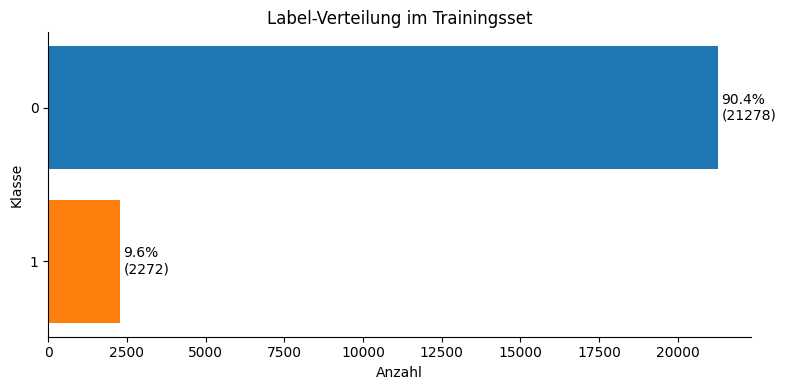

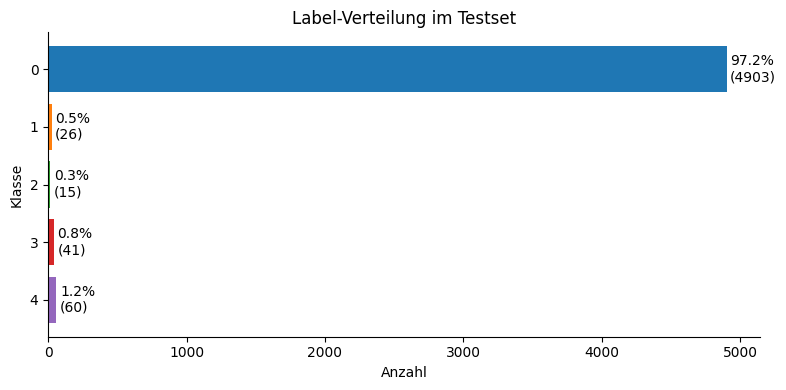

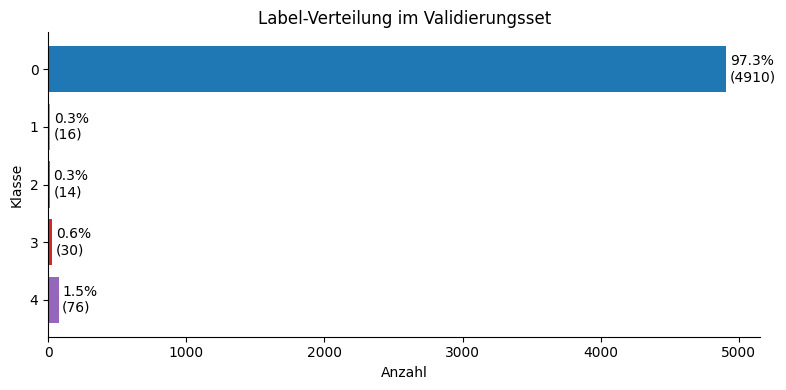

In [7]:
plot_label_distribution_bar(tte_train_df["in_study_repair"], "Label-Verteilung im Trainingsset")
plot_label_distribution_bar(labels_test_df["class_label"], "Label-Verteilung im Testset")
plot_label_distribution_bar(labels_validation_df["class_label"], "Label-Verteilung im Validierungsset")


#### Histogramm der Klassen und Anzahl der Fahrzeuge

In [8]:

def plot_observation_time_histogram(tte_df: pd.DataFrame) -> None:
    """
    Plots a histogram of observation times grouped by label (e.g., repair vs. healthy).

    Args:
        tte_df (pd.DataFrame): DataFrame containing the columns 'length_of_study_time_step' and 'in_study_repair'.

    Returns:
        None: Displays the histogram.
    """
    # Farben für Label 0 (gesund) und 1 (repariert)
    colors = {0: 'darkblue', 1: 'lightcoral'}
    
    plt.figure(figsize=(6, 4))

    # Histogramme getrennt nach Label zeichnen
    for label in sorted(tte_df["in_study_repair"].unique()):
        subset = tte_df[tte_df["in_study_repair"] == label]
        plt.hist(subset["length_of_study_time_step"], bins=150, alpha=0.8,
                 label=str(label), color=colors.get(label, 'gray'))

    plt.xlabel("Beobachtungszeit")
    plt.ylabel("Anzahl der Fahrzeuge")
    plt.title("Verteilung der Beobachtungszeit im Trainingsset")
    plt.legend(title="Label")
    plt.tight_layout()
    plt.show()


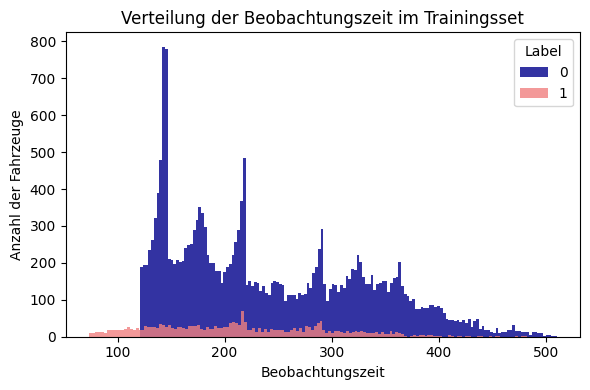

In [9]:
plot_observation_time_histogram(tte_train_df)


In [10]:
# Nur Zeilen mit Label 0 (kein Ausfall)
label_0_df = tte_train_df[tte_train_df["in_study_repair"] == 0]

# Nach Zeit sortieren und früheste 5 anzeigen
label_0_df_sorted = label_0_df.sort_values("length_of_study_time_step")
print(label_0_df_sorted.head())

       vehicle_id  length_of_study_time_step  in_study_repair
9277        13348                      121.0                0
22560       32255                      121.0                0
15650       22373                      121.0                0
22782       32562                      121.0                0
9974        14330                      121.0                0


#### Berechnung der Gini-Index und die Entropie

In [11]:
import numpy as np
from collections import Counter

def gini_index(y):
    counts = np.array(list(Counter(y).values()))
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

def entropy(y):
    counts = np.array(list(Counter(y).values()))
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-10))  # log2 für bessere Interpretierbarkeit

In [12]:
print("Gini (tte Train):", gini_index(tte_train_df["in_study_repair"]))
print("Entropie (tte Train):", entropy(tte_train_df["in_study_repair"]))
print("Gini (Labels Train):", gini_index(labels_test_df["class_label"]))
print("Entropie (Labels Train):", entropy(labels_test_df["class_label"]))
print("Gini (Labels Validation):", gini_index(labels_validation_df["class_label"]))
print("Entropie (Labels Validation):", entropy(labels_validation_df["class_label"]))

Gini (tte Train): 0.17433609116439253
Entropie (tte Train): 0.4577228417895695
Gini (Labels Train): 0.05525823583781653
Entropie (Labels Train): 0.23662140094920772
Gini (Labels Validation): 0.05289772460387798
Entropie (Labels Validation): 0.22336740226825713


### Analyse der Spezifikation der Fahrzeuge

In [13]:
spec_train = raw_data["train"]["spec"]
spec_test = raw_data["test"]["spec"]
spec_validation = raw_data["validation"]["spec"]

In [14]:

def get_random_vehicle_per_class(df: pd.DataFrame, label_column: str) -> dict[int, str]:
    """
    Erstellt ein Dictionary, das für jede Klasse (0–4) ein zufälliges Fahrzeug (`vehicle_id`) enthält.

    Args:
        df (pd.DataFrame): DataFrame mit Klassenlabels, enthält Spalten 'vehicle_id' und 'class_label'.
        label_column (str): Name der Spalte, die die Klassenlabels enthält.
    Returns:
        dict[int, str]: Dictionary mit Klassenlabels (0–4) als Keys und jeweils einer zufälligen `vehicle_id` als Value.
    """
    result = {}
    for label in sorted(df[label_column].unique()):
        vehicle_ids = df[df[label_column] == label]['vehicle_id'].tolist()
        if vehicle_ids:
            result[label] = random.choice(vehicle_ids)
    return result


In [15]:
vehicle_dict_04 = get_random_vehicle_per_class(labels_test_df, "class_label")

print("Zufällige Fahrzeuge pro Klasse (Testset (0-4)):")
for label, vehicle_id in vehicle_dict_04.items():
    print(f"Klasse {label}: Fahrzeug {vehicle_id}")

Zufällige Fahrzeuge pro Klasse (Testset (0-4)):
Klasse 0: Fahrzeug 30669
Klasse 1: Fahrzeug 10756
Klasse 2: Fahrzeug 4448
Klasse 3: Fahrzeug 1156
Klasse 4: Fahrzeug 4189


In [16]:
vehicle_dict_01 = get_random_vehicle_per_class(tte_train_df, "in_study_repair")

print("Zufällige Fahrzeuge pro Klasse (Trainingsset (0-4)):")
for label, vehicle_id in vehicle_dict_01.items():
    print(f"Klasse {label}: Fahrzeug {vehicle_id}")

Zufällige Fahrzeuge pro Klasse (Trainingsset (0-4)):
Klasse 0: Fahrzeug 14404
Klasse 1: Fahrzeug 27680


### Histogram der Spezifikation Daten

#### Histogram der Specs nach Training/Validation/Test

In [17]:
def plot_individual_spec_distributions(
    spec_train: pd.DataFrame,
    spec_val: pd.DataFrame,
    spec_test: pd.DataFrame
) -> None:
    """
    Plottet für jede Spezifikationsspalte (beginnend mit 'Spec_') ein separates Balkendiagramm
    zur Verteilung der Ausprägungen in Train, Val und Test.

    Args:
        spec_train (pd.DataFrame): Trainings-Spezifikationen.
        spec_val (pd.DataFrame): Validierungs-Spezifikationen.
        spec_test (pd.DataFrame): Test-Spezifikationen.

    Returns:
        None: Zeigt für jede 'Spec_'-Spalte einen Plot.
    """
    spec_cols = [col for col in spec_train.columns if col.startswith("Spec_")]

    for col in spec_cols:
        # Relative Häufigkeit berechnen
        train_counts = spec_train[col].value_counts(normalize=True)
        val_counts = spec_val[col].value_counts(normalize=True)
        test_counts = spec_test[col].value_counts(normalize=True)

        # Alle Kategorien, die irgendwo vorkommen
        all_categories = sorted(set(train_counts.index)
                                .union(val_counts.index)
                                .union(test_counts.index))

        x = range(len(all_categories))
        width = 0.25

        plt.figure(figsize=(10, 4))
        plt.bar(
            [i - width for i in x],
            [train_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Train Spec",
            color="darkblue"
        )
        plt.bar(
            x,
            [val_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Val Spec",
            color="gray"
        )
        plt.bar(
            [i + width for i in x],
            [test_counts.get(cat, 0) for cat in all_categories],
            width=width,
            label="Test Spec",
            color="firebrick"
        )

        plt.title(f"Verteilung der Spezifikation: {col}")
        plt.xlabel("Kategorie")
        plt.ylabel("Proportion")
        plt.xticks(ticks=x, labels=all_categories, rotation=45)
        plt.ylim(0, 1)
        plt.legend()
        plt.tight_layout()
        plt.show()

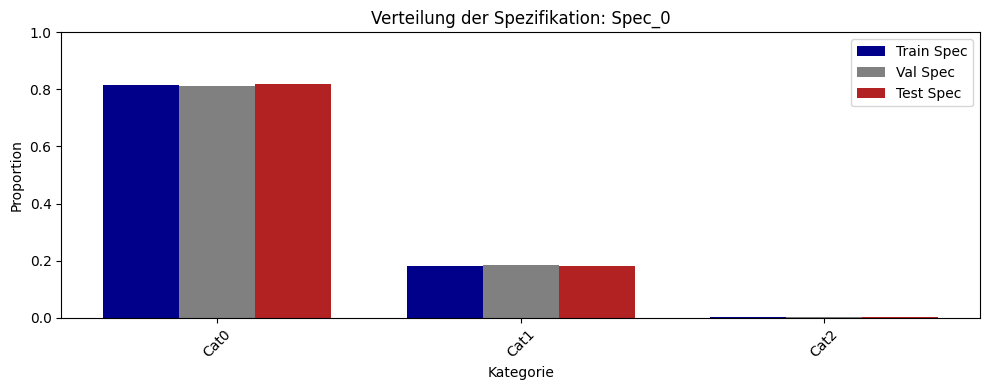

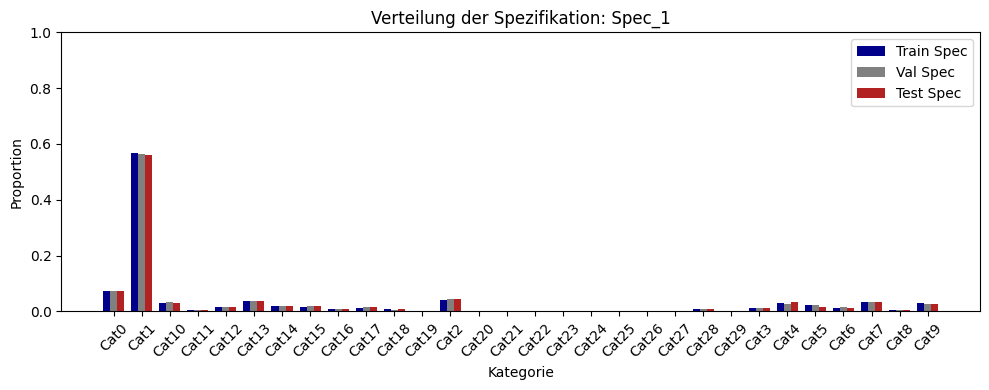

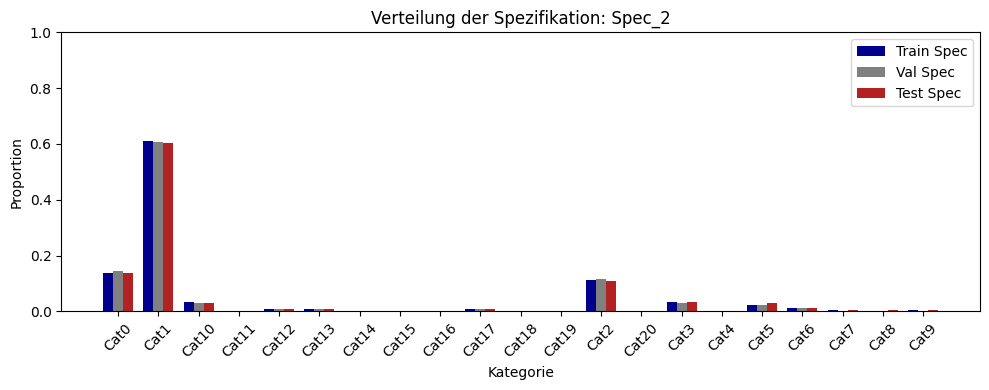

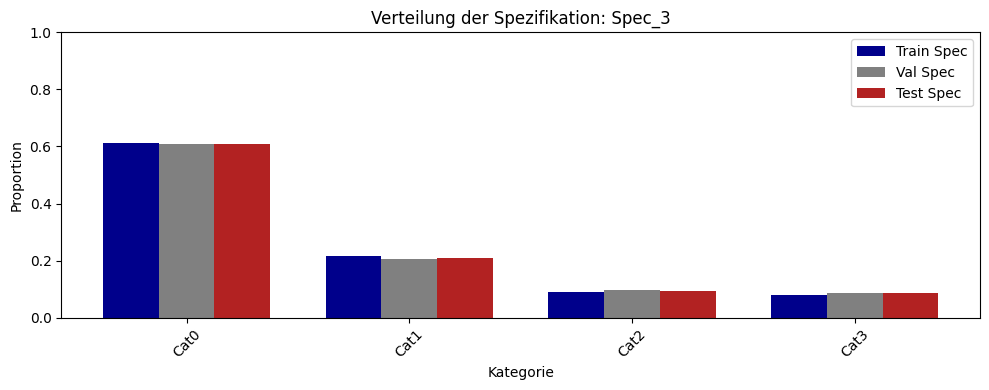

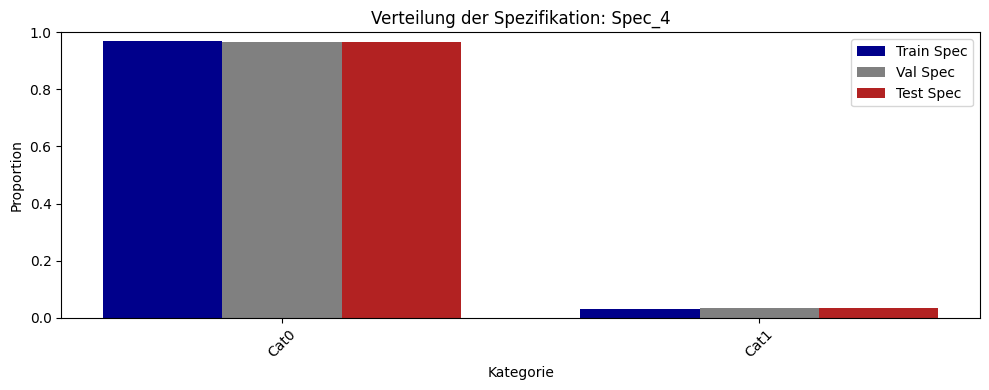

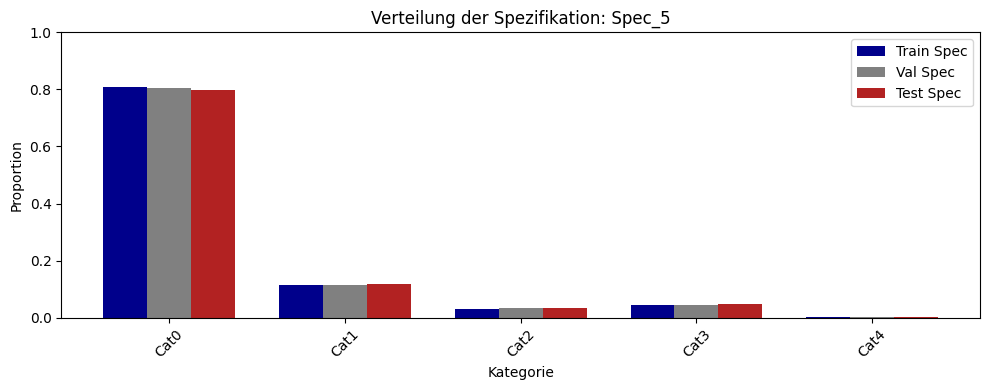

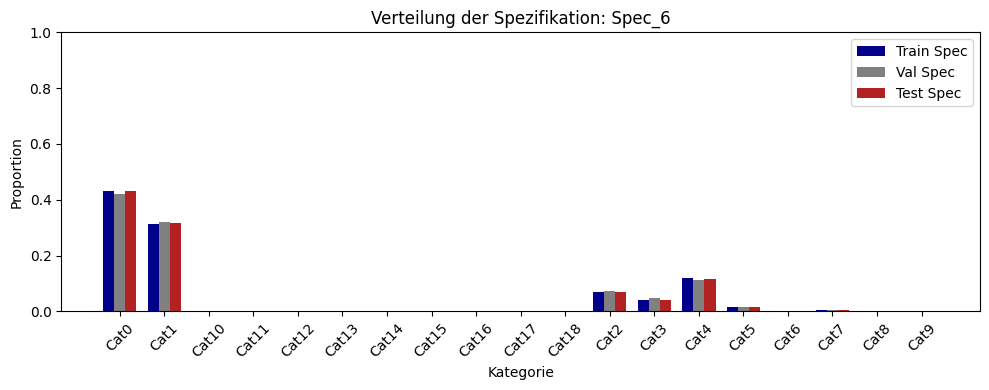

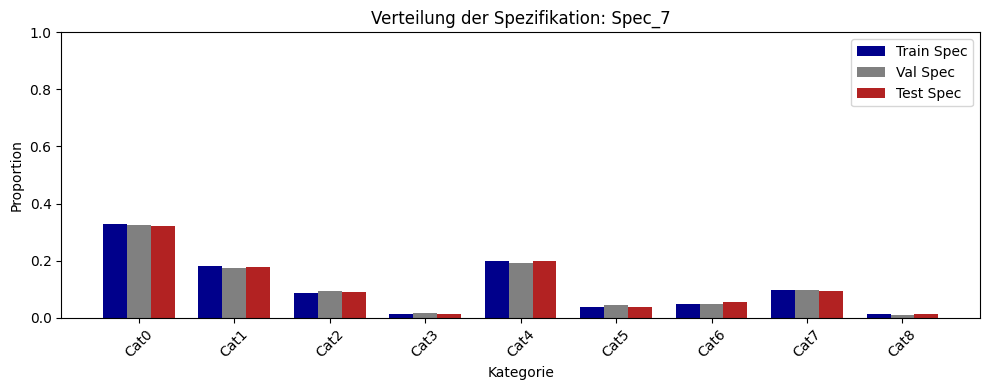

In [18]:
plot_individual_spec_distributions(
    spec_train,
    spec_validation,
    spec_test
)


#### Histogram der Specs nach Labels

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_spec_distributions_by_label(
    spec_df: pd.DataFrame,
    labels_df: pd.DataFrame,
    label_column: str,
    Name_df: str
) -> None:
    """
    Visualisiert die Spezifikationsverteilungen (Spec_*) für beliebig viele Klassenlabels.
    Die Daten werden über 'vehicle_id' gemerged. Für jede Spezifikationsspalte wird ein
    Balkendiagramm erzeugt, das die relative Häufigkeit pro Kategorie und Label zeigt.

    Args:
        spec_df (pd.DataFrame): DataFrame mit Spezifikationsdaten (enthält vehicle_id).
        labels_df (pd.DataFrame): DataFrame mit Labels (enthält vehicle_id und Labelspalte).
        label_column (str): Name der Spalte in labels_df, die die Klassenlabels enthält.
        Name_df (str): Name des DataFrames (z.B. "Train" oder "Test").

    Returns:
        None: Zeigt für jede Spezifikationsspalte ein separates Balkendiagramm.
    """
    # Merge über vehicle_id (join inner)
    merged_df = pd.merge(spec_df, labels_df[['vehicle_id', label_column]], on='vehicle_id', how='inner')

    # Nur Spezifikationsspalten verwenden
    spec_cols = [col for col in merged_df.columns if col.startswith("Spec_")]

    # Automatische Farbcodierung nach Anzahl Labels
    unique_labels = sorted(merged_df[label_column].unique())
    num_labels = len(unique_labels)
    color_palette = plt.cm.get_cmap("tab10", num_labels)

    for col in spec_cols:
        plt.figure(figsize=(10, 4))

        # Verteilungen je Kategorie und Label
        proportions = (
            merged_df.groupby(label_column)[col]
            .value_counts(normalize=True)
            .unstack(fill_value=0)
        )

        x = range(len(proportions.columns))
        width = 0.8 / num_labels  # dynamische Balkenbreite

        for i, label in enumerate(proportions.index):
            values = proportions.loc[label].values
            plt.bar(
                [pos + (i - num_labels / 2) * width + width / 2 for pos in x],
                values,
                width=width,
                label=f"Label {label}",
                color=color_palette(i)
            )

        plt.title(f"Verteilung von {Name_df} {col} nach Label")
        plt.xlabel("Kategorie")
        plt.ylabel("Verteilung")
        plt.xticks(ticks=range(len(proportions.columns)), labels=proportions.columns, rotation=45)
        plt.ylim(0, 1)
        plt.legend(title="Label")
        plt.tight_layout()
        plt.show()


[07/23/25 05:06:23] WARNING  /tmp/ipykernel_1345/3279925041.py:33: MatplotlibDeprecationWarning:    ]8;id=562596;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=323139;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             The get_cmap function was deprecated in Matplotlib 3.7 and will be                    
                             removed in 3.11. Use ``matplotlib.colormaps`` or                                      
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               color_palette = plt.cm.get_cmap("tab10", num_labels)                                
                                                                                                                   

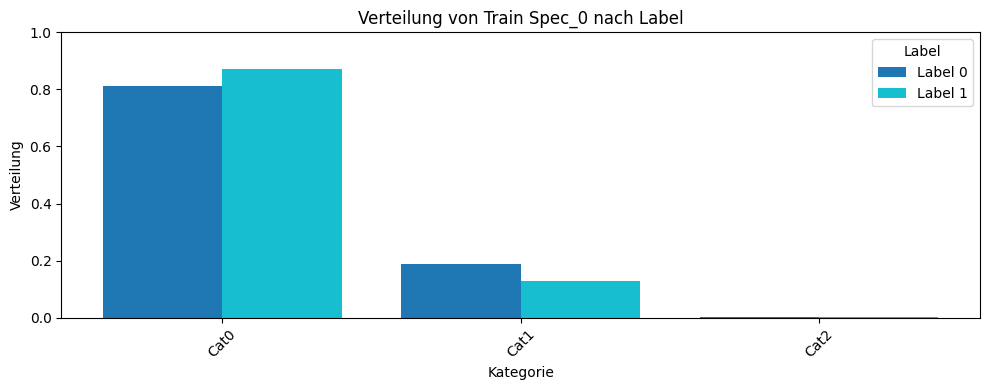

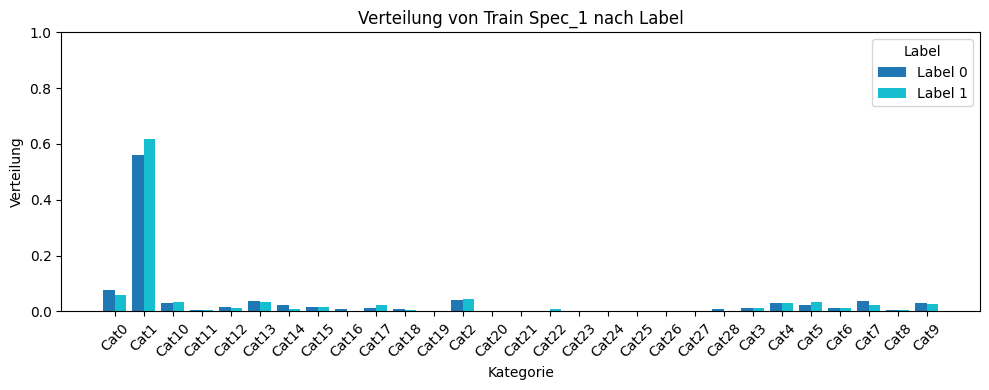

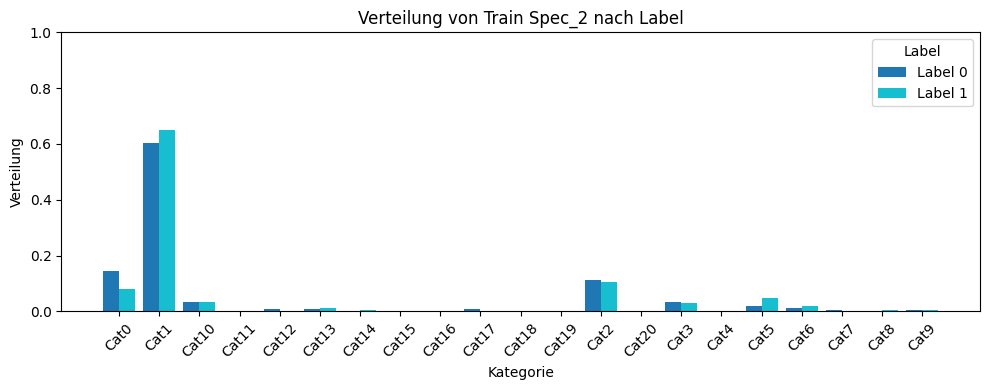

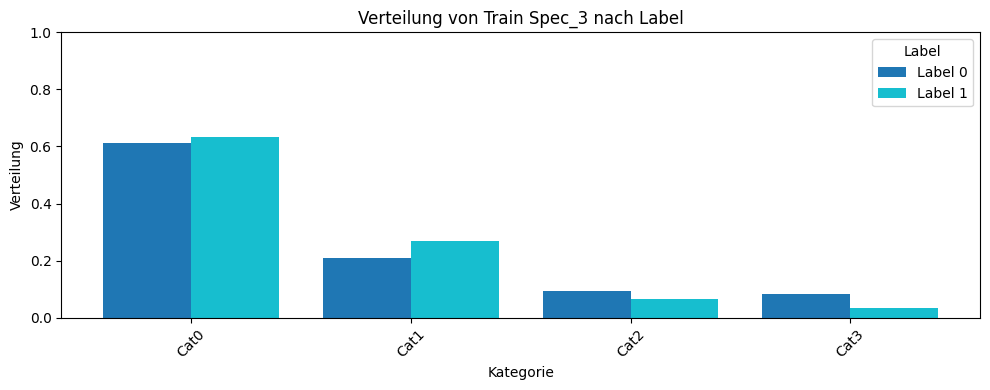

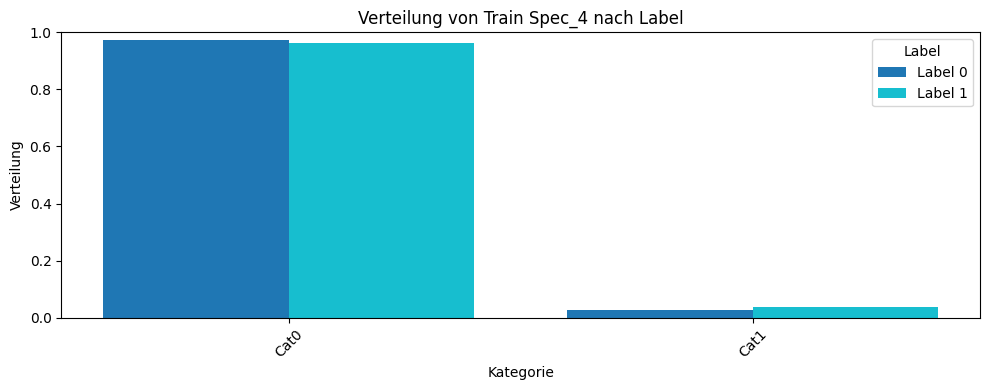

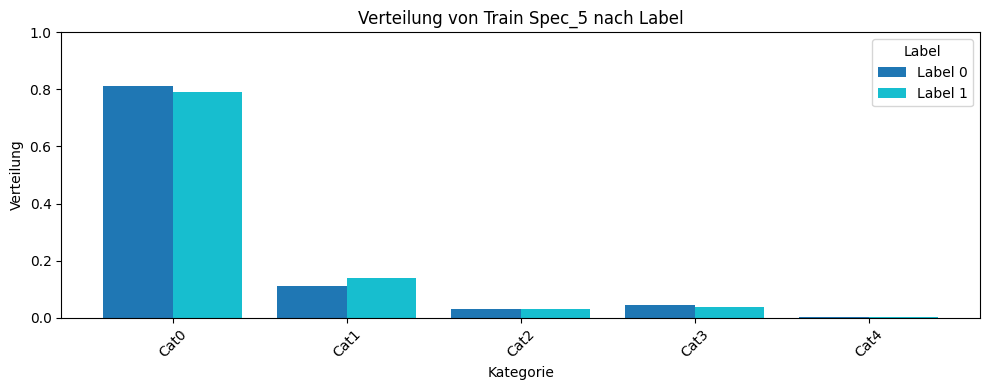

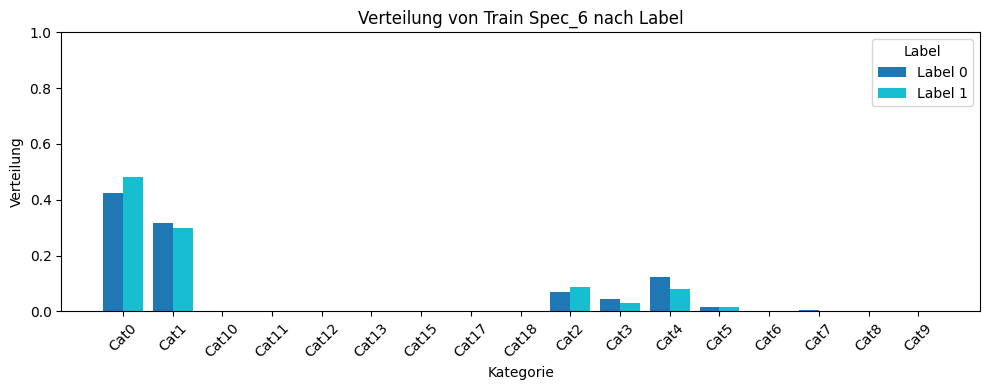

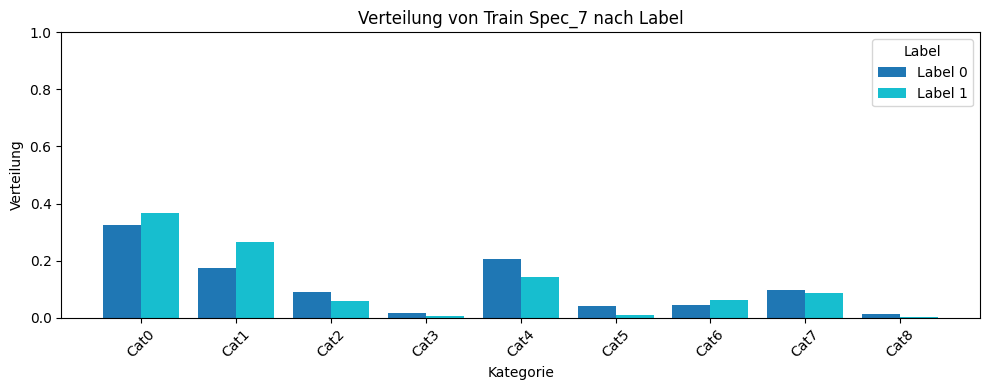

In [20]:
plot_spec_distributions_by_label(
    spec_train,
    tte_train_df,
    label_column="in_study_repair",
    Name_df = "Train"
)


In [21]:
#test und Validation Spec und Label daten zusammenführen
test_validation_labels = pd.concat([labels_test_df, labels_validation_df], ignore_index=True)
test_validation_spec = pd.concat([spec_test, spec_validation], ignore_index=True)

[07/23/25 05:06:24] WARNING  /tmp/ipykernel_1345/3279925041.py:33: MatplotlibDeprecationWarning:    ]8;id=422358;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=977700;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             The get_cmap function was deprecated in Matplotlib 3.7 and will be                    
                             removed in 3.11. Use ``matplotlib.colormaps`` or                                      
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               color_palette = plt.cm.get_cmap("tab10", num_labels)                                
                                                                                                                   

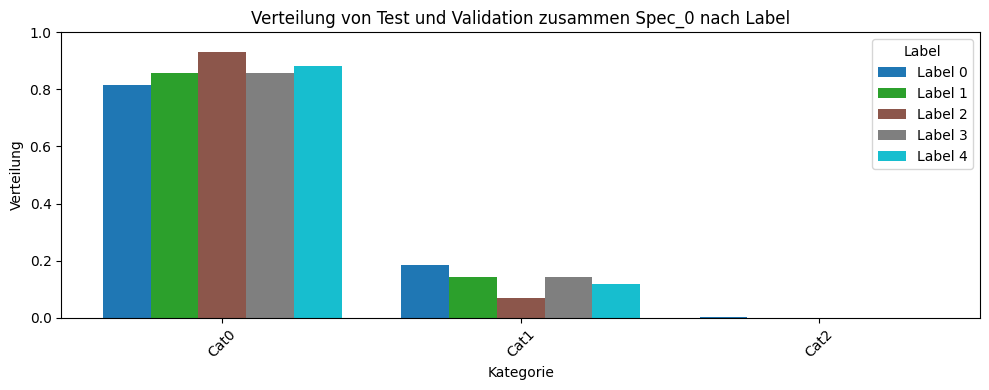

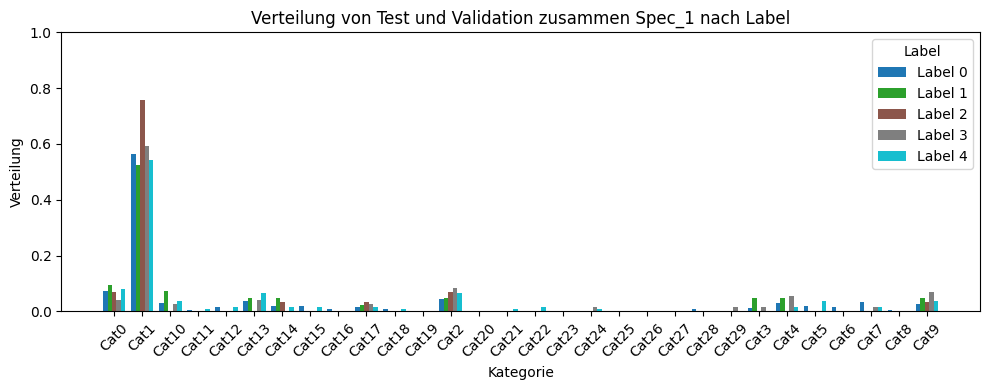

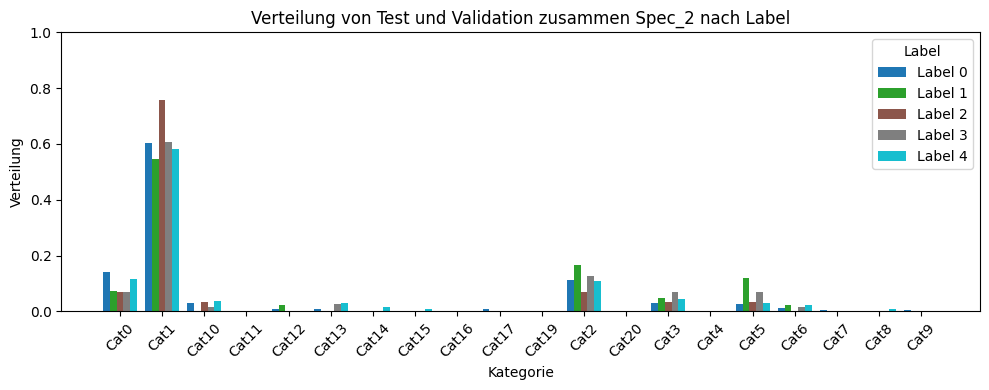

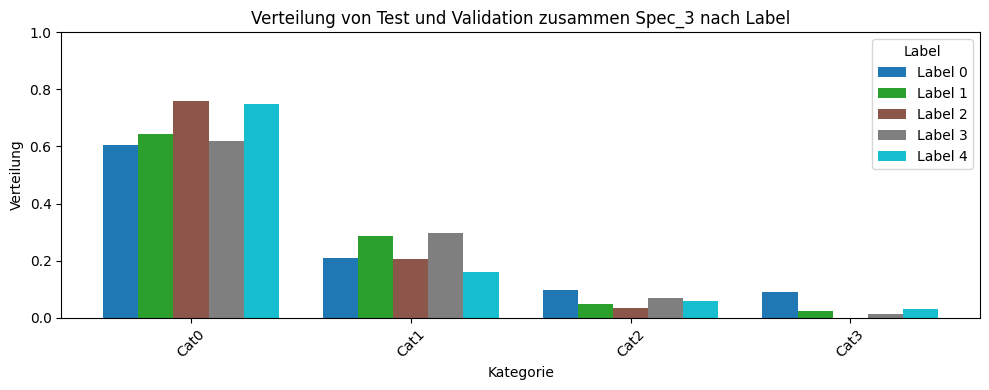

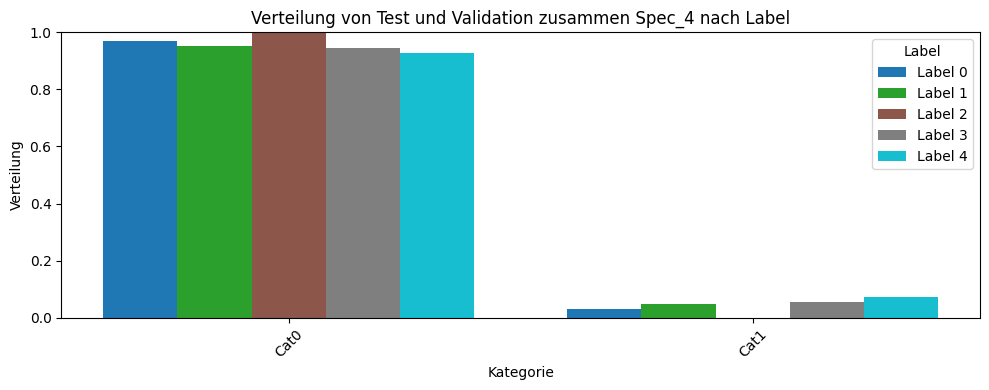

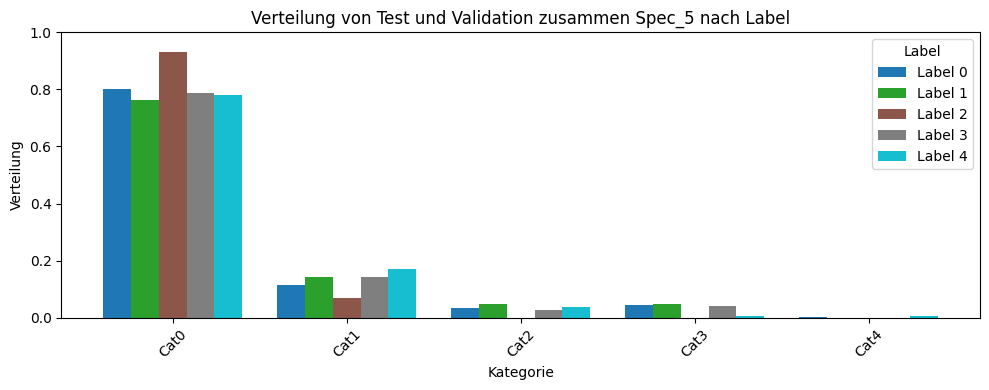

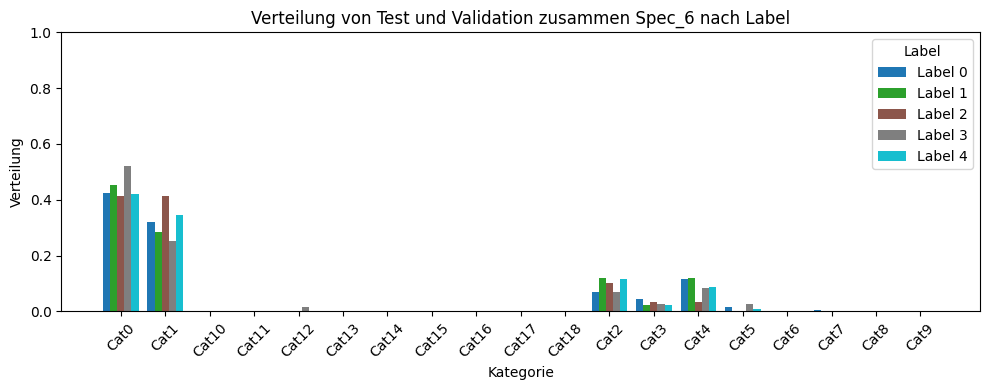

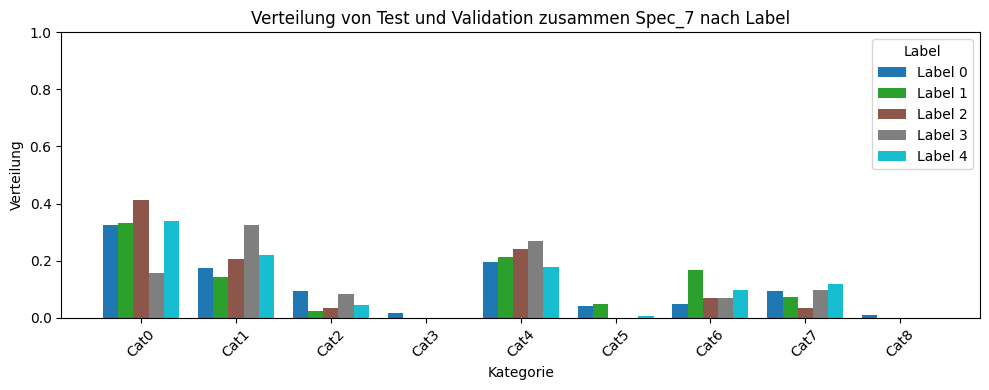

In [22]:
plot_spec_distributions_by_label(
    test_validation_spec,
    test_validation_labels,
    label_column="class_label",
    Name_df = "Test und Validation zusammen"
)

#### Berechnung des Cramér’s V

In [23]:

def cramers_v(confusion_matrix: pd.DataFrame) -> float:
    """
    Berechnet Cramér's V für eine gegebene Kontingenztabelle.
    
    Args:
        confusion_matrix (pd.DataFrame): Kreuztabelle (z. B. aus pd.crosstab).
    
    Returns:
        float: Cramér’s V Wert (Effektstärke).
    """
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def interpret_cramers_v(value: float) -> str:
    """
    Gibt eine sprachliche Interpretation für Cramér’s V zurück.
    
    Args:
        value (float): Cramér’s V Wert.
    
    Returns:
        str: Interpretation.
    """
    if value < 0.1:
        return "kein oder sehr schwacher Zusammenhang"
    elif value < 0.3:
        return "schwacher Zusammenhang"
    elif value < 0.5:
        return "mittlerer Zusammenhang"
    else:
        return "starker Zusammenhang"

def analyze_cramers_v_with_significance(
    df: pd.DataFrame, 
    labels_df: pd.DataFrame, 
    label_column: str,
    data_name: str,
    variable_id: str
) -> None:
    """
    Führt Chi²-Test und Cramér’s V Analyse für alle Spec_* Spalten durch.
    Nur signifikante Ergebnisse werden interpretiert.

    Args:
        df (pd.DataFrame): DataFrame mit Spec_* Spalten und vehicle_id.
        labels_df (pd.DataFrame): DataFrame mit Zielspalte und vehicle_id.
        label_column (str): Name der Zielspalte (z. B. 'class_label').
        data_name (str): Name des Datensatzes ('spec' oder 'readout').
        variable_id (str): ID der Variable, die für 'readout' verwendet wird (z. B. 'Spec_1').
    
    Returns:
        None: Gibt Testergebnisse aus.
    """
    
    merged_df = pd.merge(df, labels_df[['vehicle_id', label_column]], on='vehicle_id', how='inner')

    if data_name == "spec":
        spec_cols = [col for col in merged_df.columns if col.startswith("Spec_")]
    elif data_name == "readout":
        spec_cols = [col for col in merged_df.columns if col.startswith(f"{variable_id}_")]
    else:
        raise ValueError("Ungültiger data_name. Erlaubt sind 'spec' oder 'readout'.")
    for col in spec_cols:
        contingency = pd.crosstab(merged_df[col], merged_df[label_column])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(contingency)
            if p < 0.05:
                value = cramers_v(contingency)
                interpretation = interpret_cramers_v(value)
                print(f"{col}: p = {p:.10f} → signifikanter Zusammenhang")
                print(f"\tCramér’s V = {value:.4f} → {interpretation}")
            else:
                print(f"{col}: p = {p:.10f} → kein signifikanter Zusammenhang")
        else:
            print(f"{col}: Nicht berechenbar (zu wenig Variation)")


##### Für die Trainings Daten

In [24]:
analyze_cramers_v_with_significance(
    df=spec_train,
    labels_df=tte_train_df,
    label_column="in_study_repair",
    data_name="spec",
    variable_id=None  # Hier None, da keine Readout-Analyse durchgeführt wird
)


Spec_0: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0446 → kein oder sehr schwacher Zusammenhang
Spec_1: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0745 → kein oder sehr schwacher Zusammenhang
Spec_2: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0894 → kein oder sehr schwacher Zusammenhang
Spec_3: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0690 → kein oder sehr schwacher Zusammenhang
Spec_4: p = 0.0215140493 → signifikanter Zusammenhang
	Cramér’s V = 0.0135 → kein oder sehr schwacher Zusammenhang
Spec_5: p = 0.0004863268 → signifikanter Zusammenhang
	Cramér’s V = 0.0261 → kein oder sehr schwacher Zusammenhang
Spec_6: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0535 → kein oder sehr schwacher Zusammenhang
Spec_7: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.1063 → schwacher Zusammenhang


##### Für die Test und Validierungsdaten zusammen

In [25]:
analyze_cramers_v_with_significance(
    df=test_validation_spec,
    labels_df=test_validation_labels,
    label_column="class_label",
    data_name="spec",
    variable_id=None  # Hier None, da keine Readout-Analyse durchgeführt wird
)

Spec_0: p = 0.3849101096 → kein signifikanter Zusammenhang
Spec_1: p = 0.0000000000 → signifikanter Zusammenhang
	Cramér’s V = 0.0621 → kein oder sehr schwacher Zusammenhang
Spec_2: p = 0.5304743781 → kein signifikanter Zusammenhang
Spec_3: p = 0.0027306887 → signifikanter Zusammenhang
	Cramér’s V = 0.0244 → kein oder sehr schwacher Zusammenhang
Spec_4: p = 0.0392220357 → signifikanter Zusammenhang
	Cramér’s V = 0.0245 → kein oder sehr schwacher Zusammenhang
Spec_5: p = 0.6101256429 → kein signifikanter Zusammenhang
Spec_6: p = 0.9999088490 → kein signifikanter Zusammenhang
Spec_7: p = 0.0008363742 → signifikanter Zusammenhang
	Cramér’s V = 0.0278 → kein oder sehr schwacher Zusammenhang


### Analyse der Readout Daten

In [26]:
readouts_test = raw_data["test"]["readouts"]
readouts_validation = raw_data["validation"]["readouts"]
readouts_train = raw_data["train"]["readouts"]

#### Histogram der readout Daten 

##### Histograme aus den Histogram Daten

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_variable_bin_proportions_per_label(
    df_readouts: pd.DataFrame,
    df_labels: pd.DataFrame,
    variable_id: int,
    label_column: str = "class_label",
    title_prefix: str = "Test"
) -> None:
    """
    Plottet die **relative Verteilung** der Histogramm-Bins einer Variable, gruppiert nach Label (0–4).

    Args:
        df_readouts (pd.DataFrame): DataFrame mit Histogramm-Daten (z. B. 167_0 bis 167_9).
        df_labels (pd.DataFrame): DataFrame mit Labels (enthält vehicle_id und Klassenlabel).
        variable_id (int): Die zu analysierende Variable (z. B. 167).
        label_column (str): Spaltenname für das Label.
        title_prefix (str): Zusätzlicher Titeltext (z. B. "Train" oder "Test").

    Returns:
        None
    """
    # Join über vehicle_id
    merged_df = pd.merge(df_readouts, df_labels[['vehicle_id', label_column]], on='vehicle_id', how='inner')

    # Bin-Spalten der Variable
    bin_cols = [col for col in merged_df.columns if col.startswith(f"{variable_id}_")]
    if not bin_cols:
        print(f"Keine Bins für Variable {variable_id} gefunden.")
        return

    # Gruppieren: pro Label → Mittelwert (normiert auf 1)
    grouped = merged_df.groupby(label_column)[bin_cols].sum()

    # Pro Label: normieren auf Summe 1 (Verteilung)
    proportions = grouped.div(grouped.sum(axis=1), axis=0)

    # Plot
    plt.figure(figsize=(12, 6))
    x = range(len(bin_cols))
    num_labels = len(proportions)
    bar_width = 0.8 / num_labels
    colors = plt.cm.get_cmap("tab10", num_labels)

    for i, label in enumerate(proportions.index):
        values = proportions.loc[label].values
        positions = [xi + (i - num_labels / 2) * bar_width + bar_width / 2 for xi in x]
        plt.bar(
            positions,
            values,
            width=bar_width,
            label=f"Label {label}",
            color=colors(i)
        )

    plt.xticks(ticks=range(len(bin_cols)), labels=bin_cols, rotation=45)
    plt.xlabel("Bins der Variable")
    plt.ylabel("Relative Verteilung (pro Klasse normiert)")
    plt.title(f"{title_prefix}: Verteilung von Variable {variable_id} nach Label")
    plt.legend(title="Label")
    plt.tight_layout()
    plt.show()


##### Für Trainings Daten

[07/23/25 05:06:26] WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=272297;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=188951;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

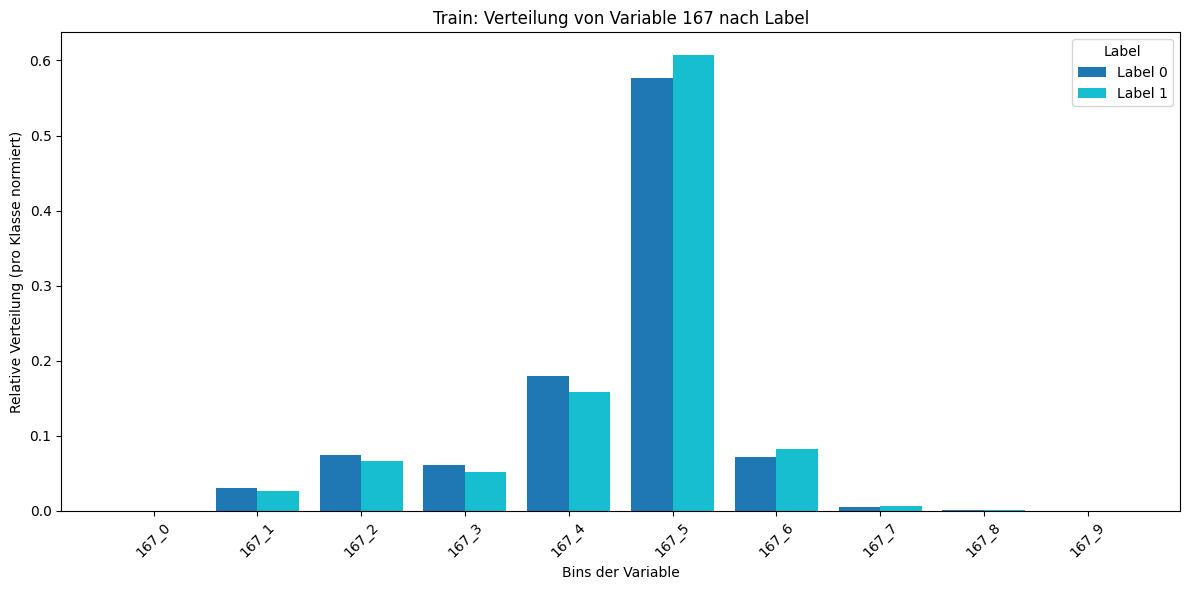

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=749613;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=693090;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

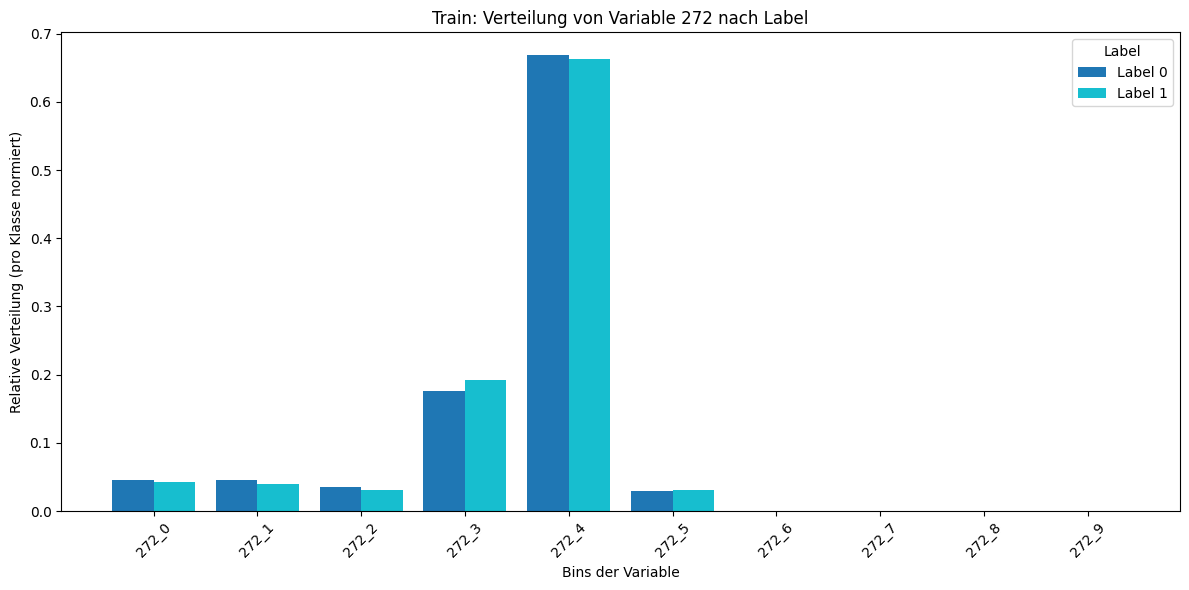

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=91319;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=847624;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

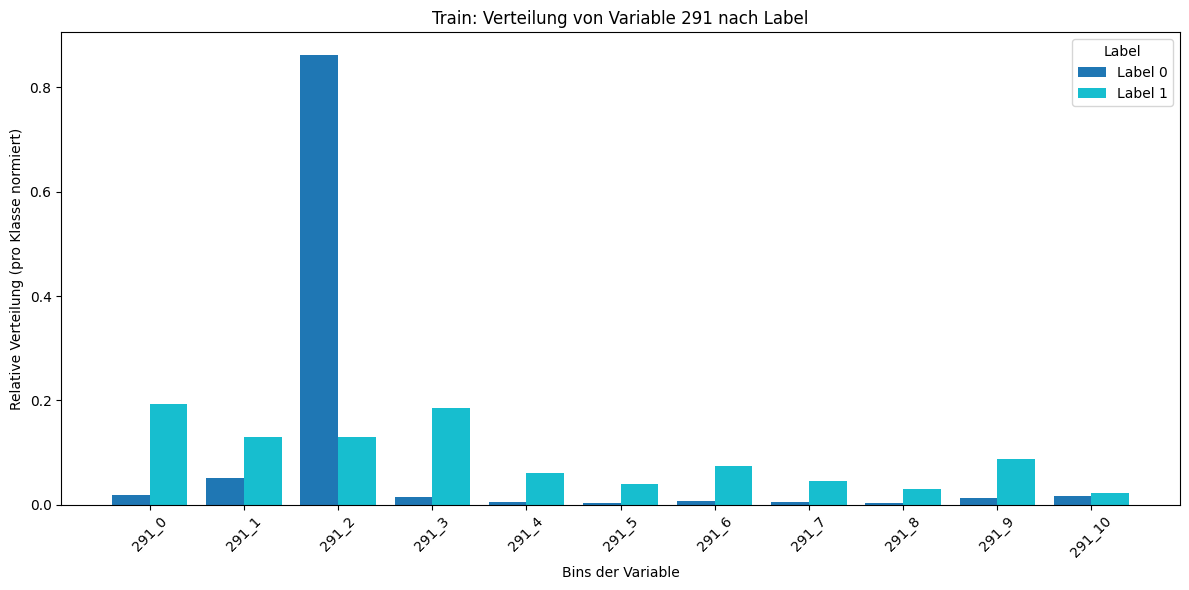

[07/23/25 05:06:27] WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=469326;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=653863;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

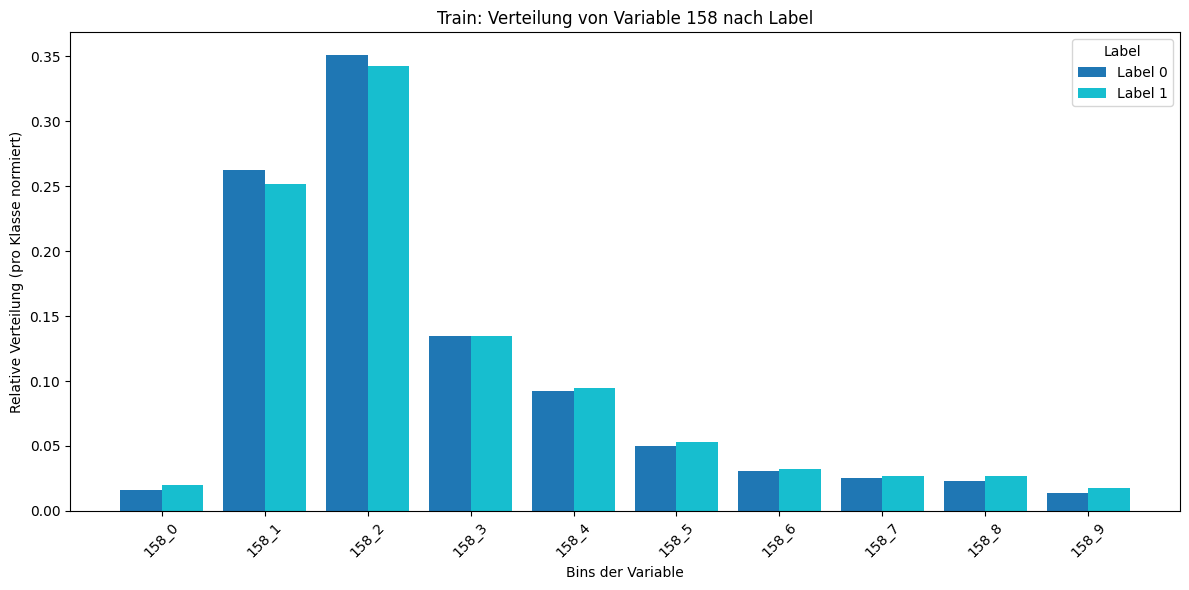

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=265964;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=570096;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

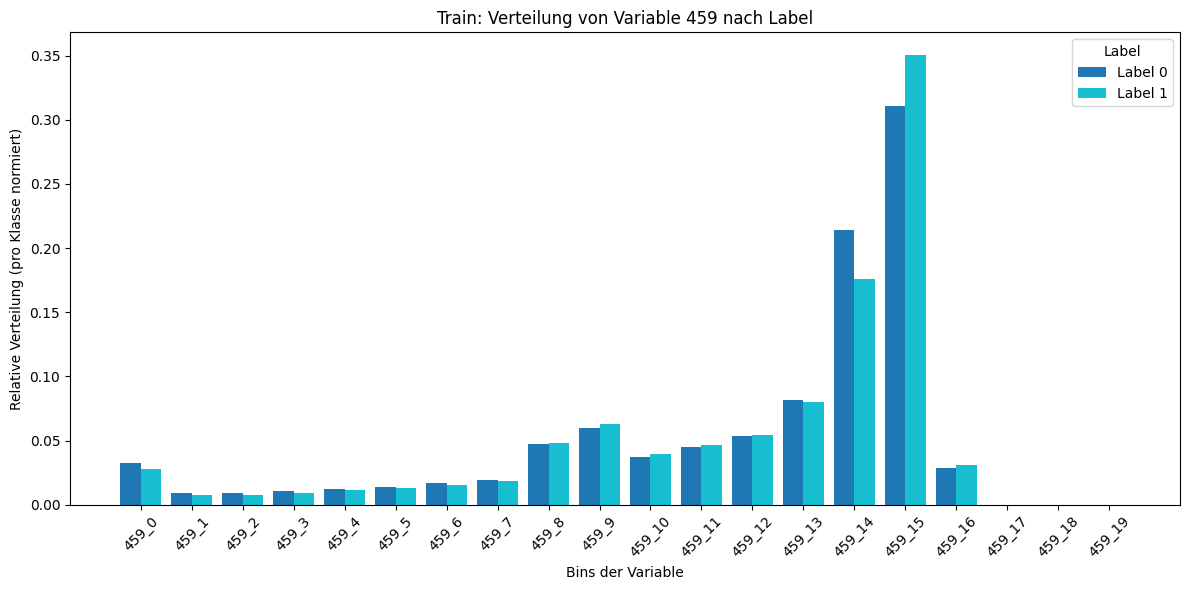

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=179618;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=324886;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

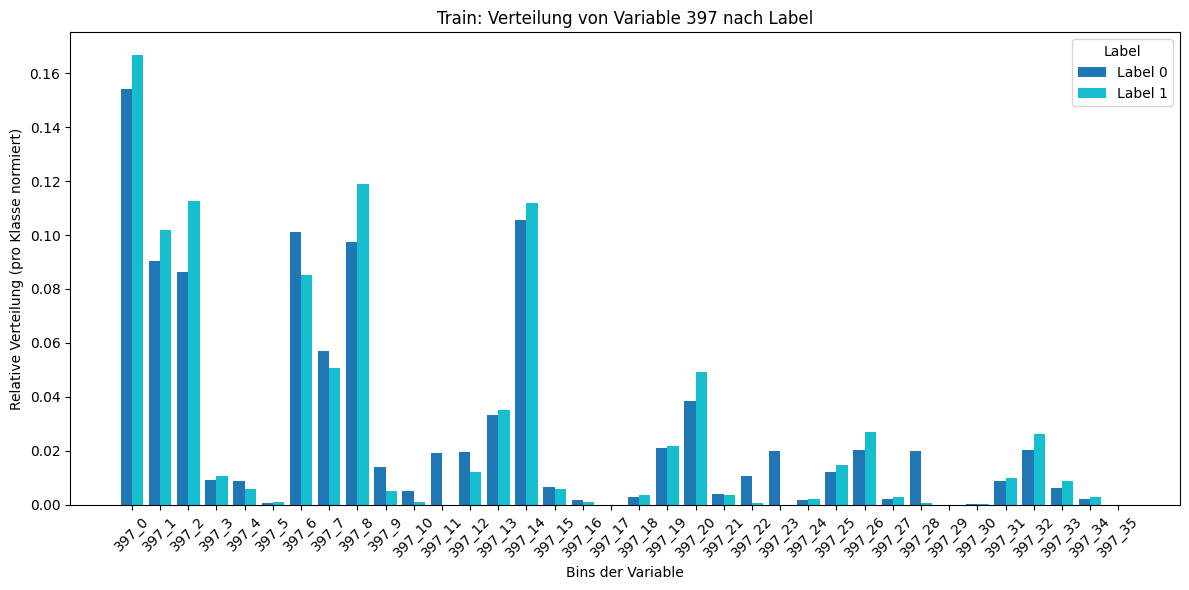

In [28]:
histogram_data_columns = [167, 272, 291, 158, 459, 397]

for variable_id in histogram_data_columns:
    plot_variable_bin_proportions_per_label(
        df_readouts=readouts_train,
        df_labels=tte_train_df,
        variable_id=variable_id,
    label_column="in_study_repair",
    title_prefix="Train"
)


##### Für Test und Validierungs Daten zusammen

In [29]:
test_validation_readout = pd.concat([readouts_test, readouts_validation], ignore_index=True)

[07/23/25 05:06:28] WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=251774;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=264648;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

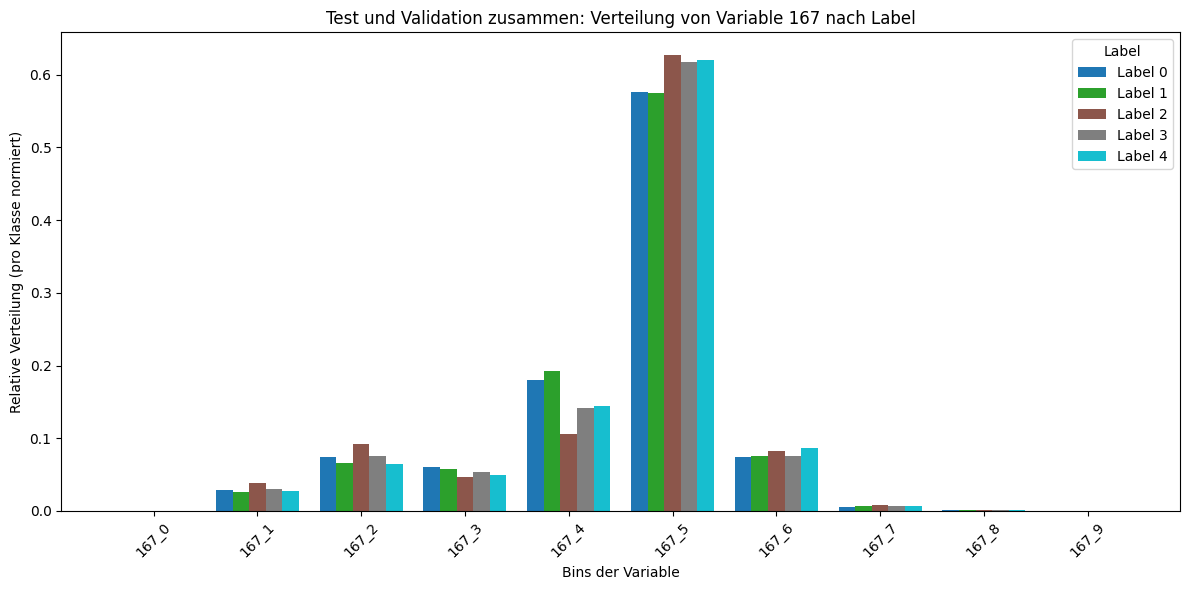

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=955040;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=682241;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

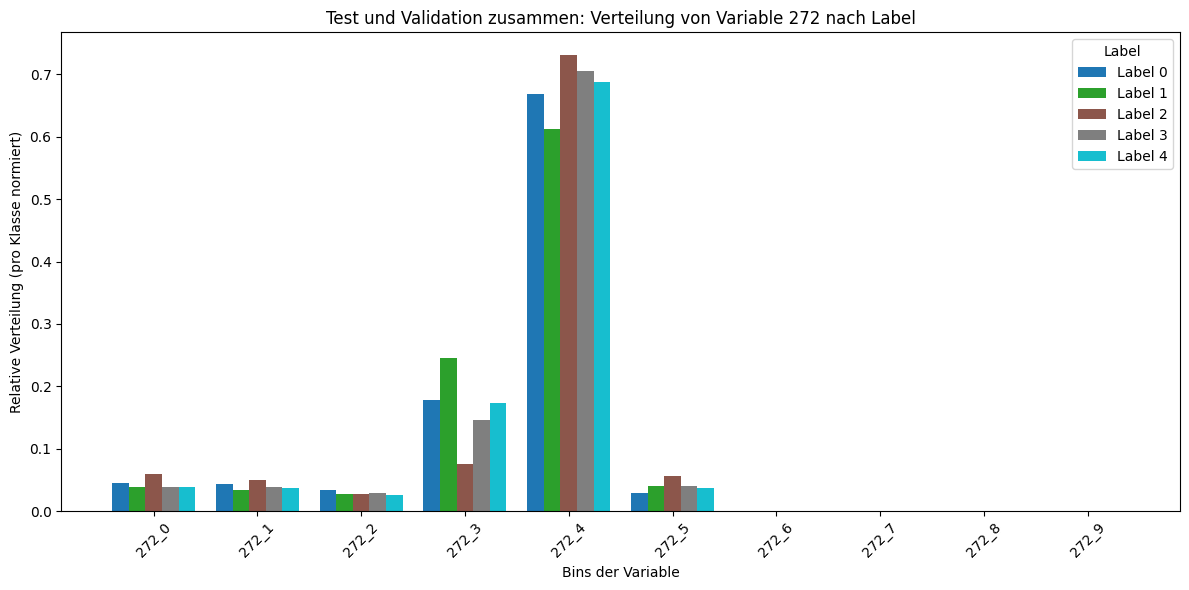

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=526541;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=639210;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

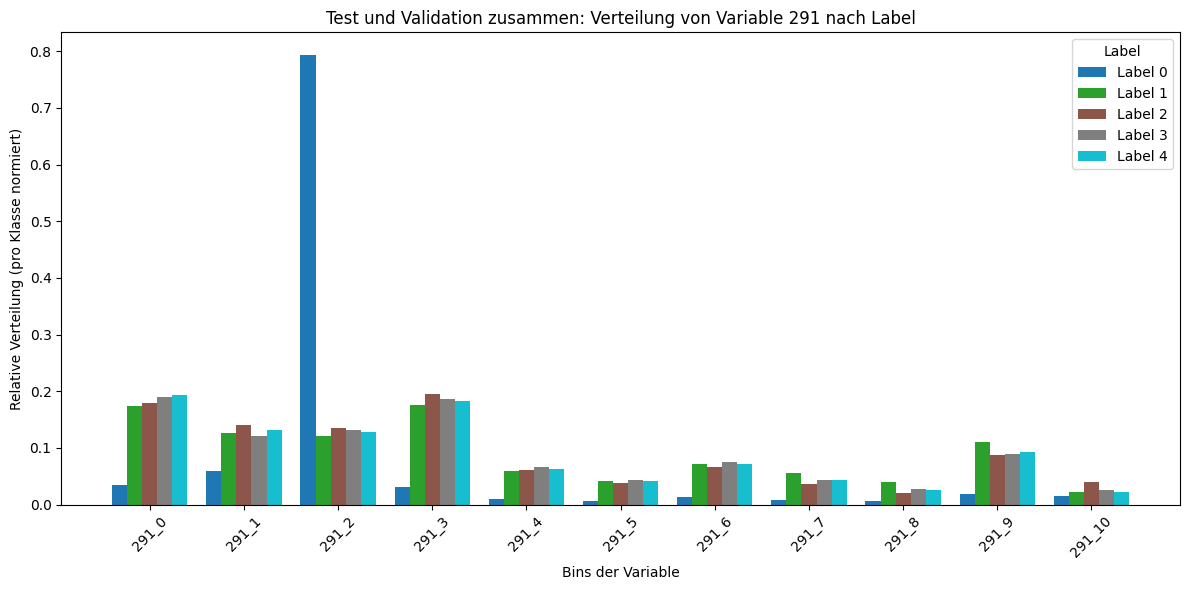

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=395753;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=795336;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

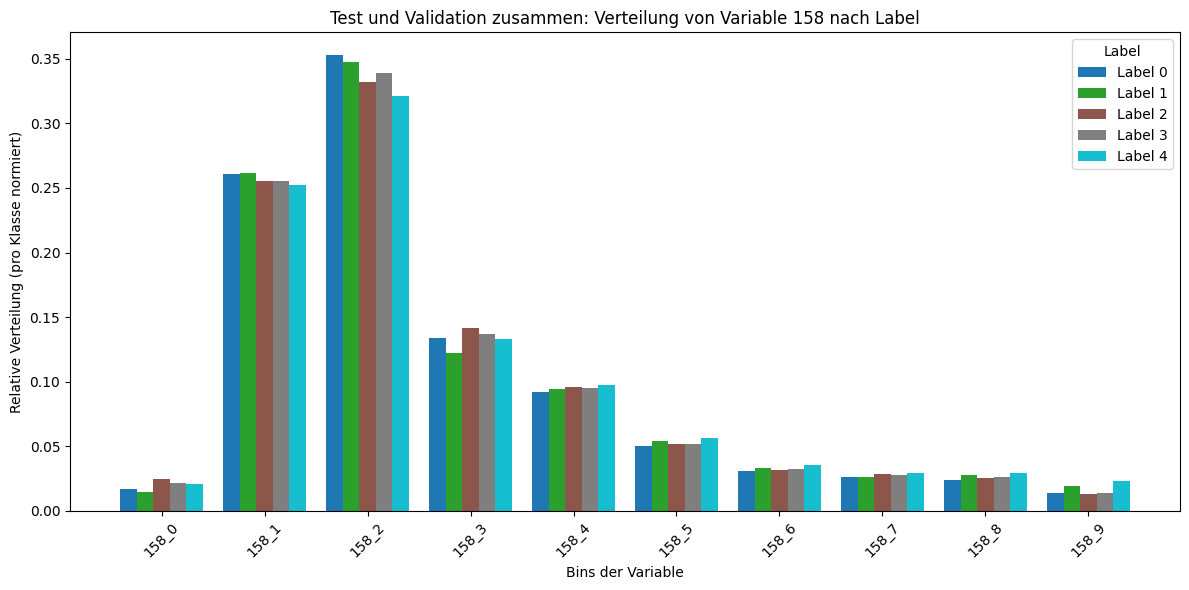

                    WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=846495;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=429849;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

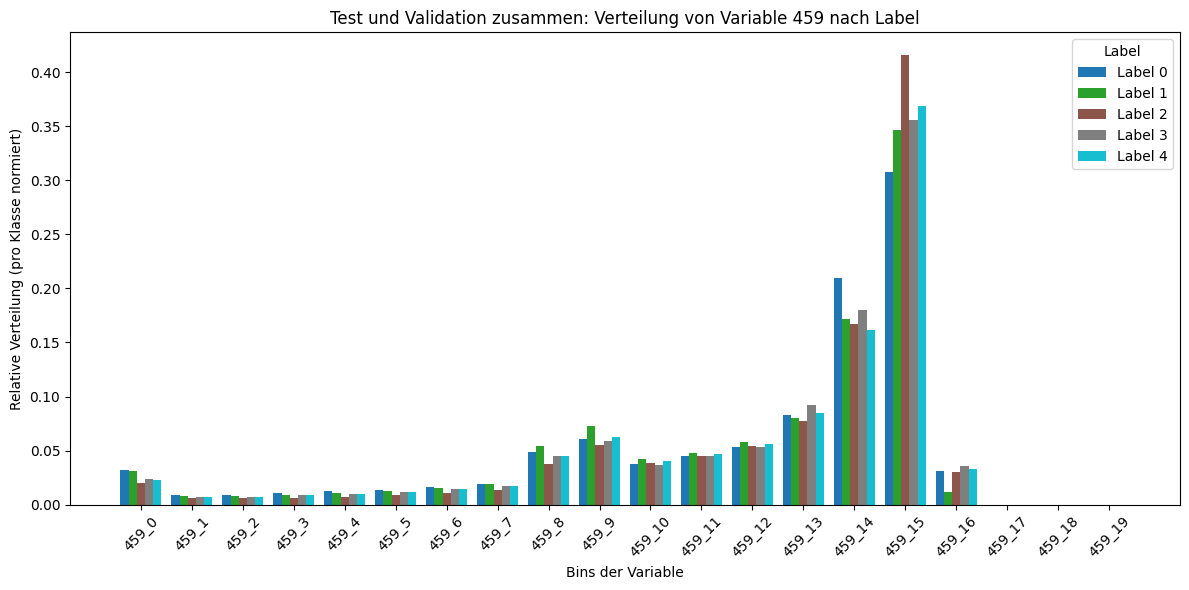

[07/23/25 05:06:29] WARNING  /tmp/ipykernel_1345/317666274.py:44: MatplotlibDeprecationWarning: The ]8;id=827623;file:///usr/lib/python3.12/warnings.py\warnings.py]8;;\:]8;id=836682;file:///usr/lib/python3.12/warnings.py#110\110]8;;\
                             get_cmap function was deprecated in Matplotlib 3.7 and will be removed                
                             in 3.11. Use ``matplotlib.colormaps`` or                                              
                             ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.                 
                               colors = plt.cm.get_cmap("tab10", num_labels)                                       
                                                                                                                   

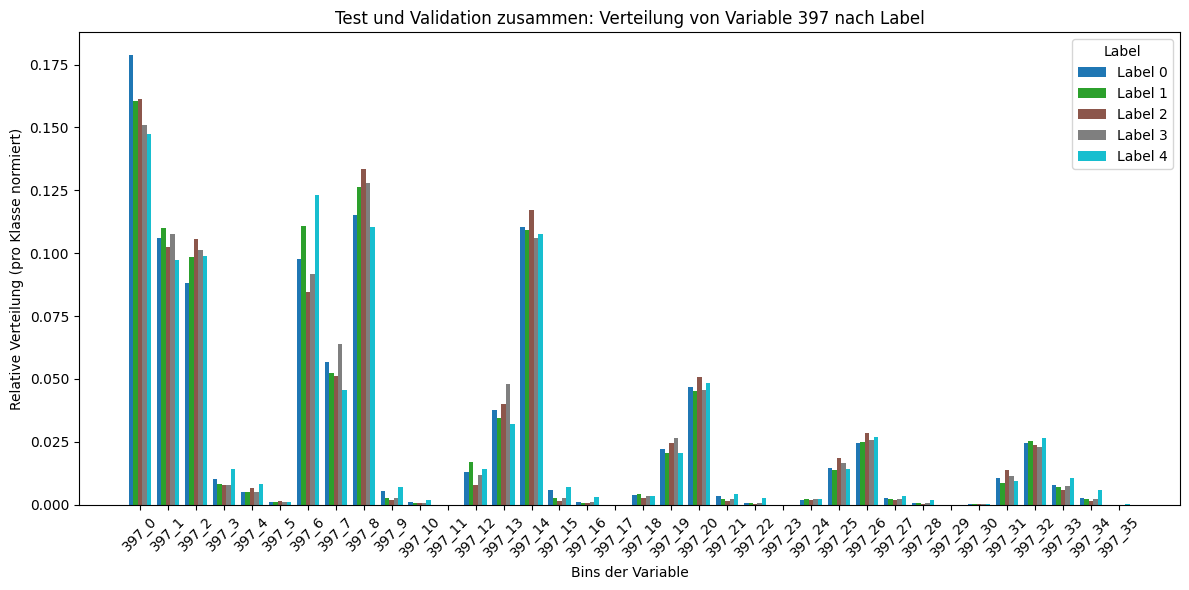

In [30]:
for variable_id in histogram_data_columns:
    plot_variable_bin_proportions_per_label(
        df_readouts=test_validation_readout,
        df_labels=test_validation_labels,
        variable_id=variable_id,
    label_column="class_label",
    title_prefix="Test und Validation zusammen"
)

#### Analyse der kontinuierlichen Werten

##### Zeitverlauf


In [42]:
def plot_continuous_features_for_labels(
    readout_df: pd.DataFrame,
    label_df: pd.DataFrame,
    variable_ids: list,
    label_column: str = "in_study_repair"
) -> None:
    """
    Plots continuous readout features over time for one vehicle from each label class (0 and 1).

    Args:
        readout_df (pd.DataFrame): DataFrame containing continuous sensor features with columns 'vehicle_id' and 'time_step'.
        label_df (pd.DataFrame): DataFrame containing the label information including 'vehicle_id' and the class label column.
        variable_ids (list): List of continuous variable column names to plot (e.g., ["171_0", "666_0", ...]).
        label_column (str): Name of the column in label_df that contains the class labels (default: "in_study_repair").

    Returns:
        None. Displays two line plots, one per class.
    """
    # Merge beide DataFrames auf vehicle_id
    merged_df = pd.merge(readout_df, label_df[['vehicle_id', label_column]], on='vehicle_id', how='inner')

    # Für jede Klasse (0 und 1) ein Fahrzeug auswählen und plotten
    for label in sorted(merged_df[label_column].unique()):
        # Ein zufälliges Fahrzeug mit diesem Label auswählen
        vehicle_id = merged_df[merged_df[label_column] == label]["vehicle_id"].iloc[0]
        vehicle_data = merged_df[merged_df["vehicle_id"] == vehicle_id].sort_values("time_step")

        # Plot vorbereiten
        plt.figure(figsize=(10, 6))
        for var in variable_ids:
            if var in vehicle_data.columns:
                plt.plot(
                    vehicle_data["time_step"], 
                    vehicle_data[var], 
                    marker="o", 
                    label=var
                )

        plt.title(f"Non-Histogram Features of Vehicle {vehicle_id} (Label {label})")
        plt.xlabel("Time Step")
        plt.ylabel("Feature Values")
        plt.legend()
        plt.tight_layout()
        plt.show()


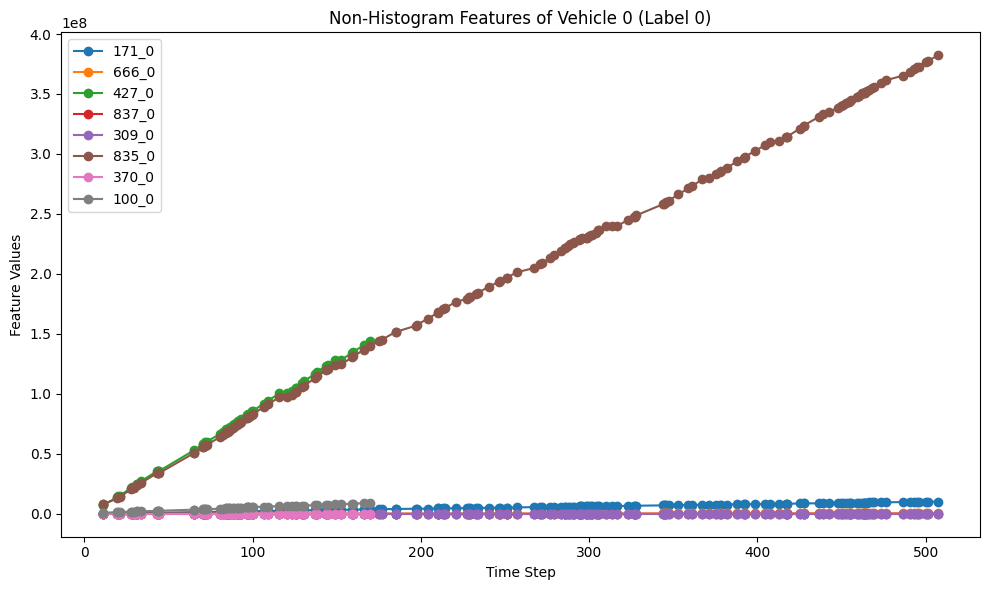

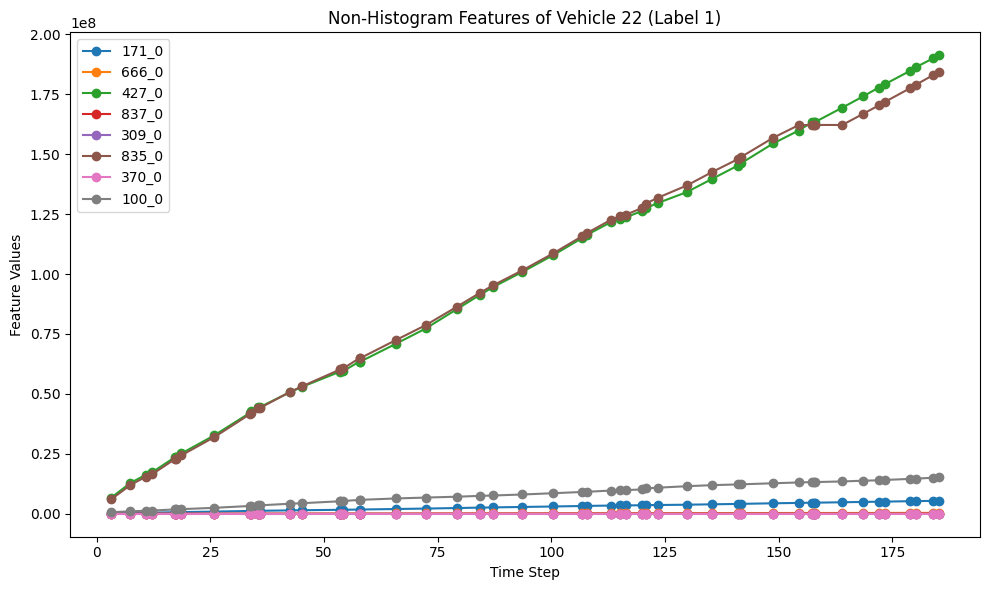

In [43]:
numeric_variable_ids = ["171_0", "666_0", "427_0", "837_0", "309_0", "835_0", "370_0", "100_0"]

plot_continuous_features_for_labels(
    readout_df=readouts_train,
    label_df=tte_train_df,
    variable_ids=numeric_variable_ids
)


##### Korrelationsmatrix

In [44]:
def plot_correlation_matrix(df: pd.DataFrame, columns: list) -> None:
    """
    Plottet eine Korrelationsmatrix für die angegebenen numerischen Spalten des DataFrames.

    Args:
        df (pd.DataFrame): Der DataFrame mit den numerischen Spalten.
        columns (list): Liste der Spaltennamen, für die die Korrelation berechnet werden soll.
        

    Returns:
        None. Zeigt eine Heatmap mit Korrelationswerten.
    """
    # Korrelation berechnen
    corr = df[columns].corr()

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
    plt.title("Korrelation der kontinuierlichen Sensorwerte")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


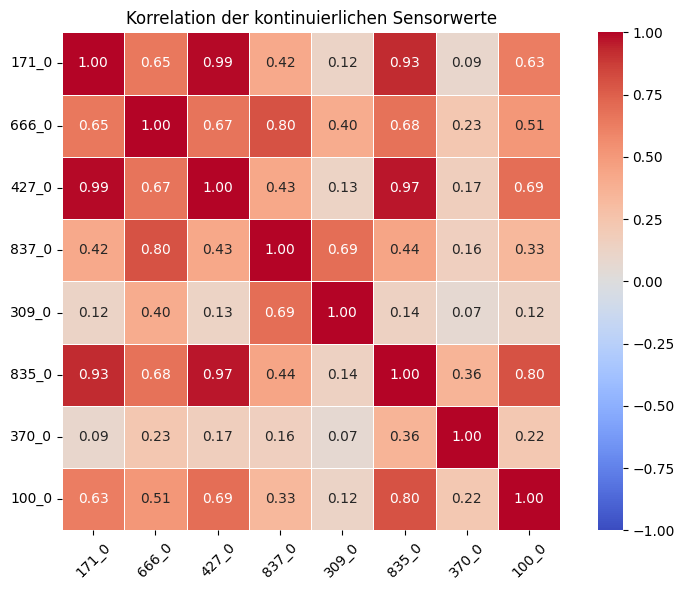

In [45]:
plot_correlation_matrix(df=readouts_train, 
                        columns=numeric_variable_ids)

#### Zeitverlauf der Readout Daten

In [39]:


def plot_vehicle_readout_timelines(
    readout_df: pd.DataFrame,
    tte_df: pd.DataFrame,
    n_healthy: int = 5,
    n_failed: int = 5
) -> None:
    """
    Plots the reading timelines of selected vehicles from the training dataset.
    Healthy and failed vehicles are displayed with markers indicating their last reading.

    Args:
        readout_df (pd.DataFrame): DataFrame with operational readouts including vehicle_id and time_step.
        tte_df (pd.DataFrame): DataFrame with time-to-event labels including vehicle_id, 
            length_of_study_time_step, and in_study_repair.
        n_healthy (int, optional): Number of healthy vehicles to display. Defaults to 5.
        n_failed (int, optional): Number of failed vehicles to display. Defaults to 5.
    
    Returns:
        None: Shows a matplotlib plot of the readout timelines.
    """
    # Auswahl der Fahrzeug-IDs
    healthy_ids = tte_df[tte_df["in_study_repair"] == 0].sample(n=n_healthy, random_state=42)["vehicle_id"].tolist()
    failed_ids = tte_df[tte_df["in_study_repair"] == 1].sample(n=n_failed, random_state=42)["vehicle_id"].tolist()
    selected_ids = healthy_ids + failed_ids

    # Subset Readout-Daten
    subset_df = readout_df[readout_df["vehicle_id"].isin(selected_ids)]

    # Mapping von vehicle_id zu y-Achsen-Position (für Klarheit)
    id_to_y = {vid: i for i, vid in enumerate(selected_ids)}

    plt.figure(figsize=(12, 5))

    # Zeichne alle Beobachtungen (blaue Punkte)
    for vid, group in subset_df.groupby("vehicle_id"):
        y_pos = id_to_y[vid]
        plt.scatter(group["time_step"], [y_pos] * len(group), color='navy', s=10)

    # Zeichne Marker für letzte Beobachtung (grün für gesund, rot für defekt)
    for vid in selected_ids:
        y_pos = id_to_y[vid]
        tte_row = tte_df[tte_df["vehicle_id"] == vid].iloc[0]
        end_time = tte_row["length_of_study_time_step"]
        label = tte_row["in_study_repair"]
        marker_color = 'green' if label == 0 else 'red'
        plt.scatter(end_time, y_pos, color=marker_color, s=50, marker='o', edgecolors='black', zorder=5)

    # Achsen
    plt.yticks(ticks=range(len(selected_ids)), labels=selected_ids)
    plt.xlabel("Time step")
    plt.ylabel("Vehicle ID")
    plt.title("Readings of Vehicles and Repair Status")

    # Manuelle Legende
    legend_elements = [
        Line2D([0], [0], marker='o', color='navy', label='Readout', markersize=6, linestyle=''),
        Line2D([0], [0], marker='o', color='green', label='Healthy (0)', markeredgecolor='black', markersize=8, linestyle=''),
        Line2D([0], [0], marker='o', color='red', label='Failed (1)', markeredgecolor='black', markersize=8, linestyle='')
    ]
    plt.legend(handles=legend_elements, loc="best")

    plt.tight_layout()
    plt.show()


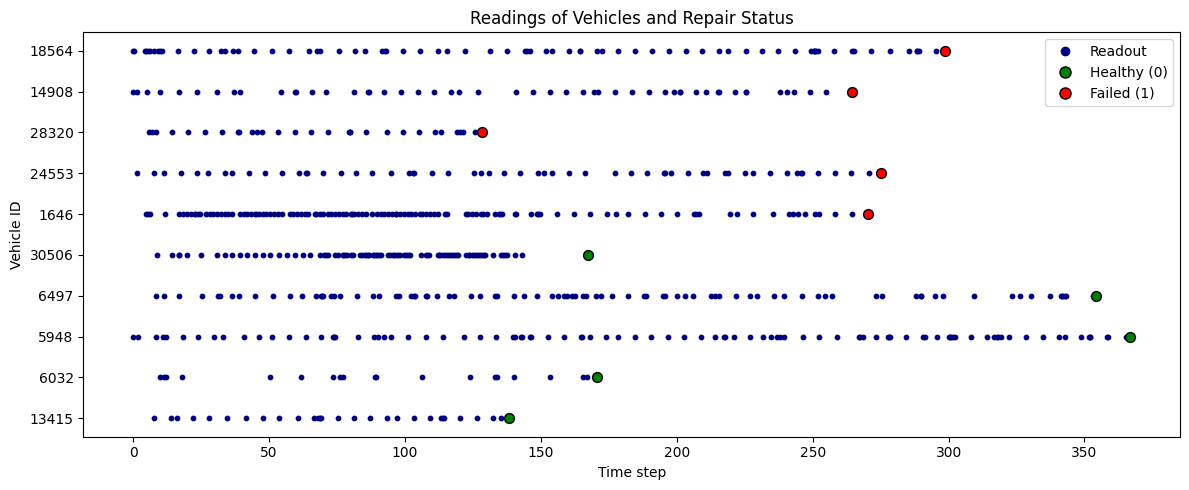

In [40]:
plot_vehicle_readout_timelines(
    readout_df=readouts_train,
    tte_df=tte_train_df)

### Analyse der Fehlenden Werte

#### Fehlende Werte im zeitverlauf

In [58]:
def plot_missing_value_trend_per_time(raw_data: dict) -> None:
    """
    Visualisiert für jeden DataFrame in raw_data den Verlauf fehlender Werte über den Zeitverlauf.
    Für jede Spalte wird der Anteil an fehlenden Werten pro time_step berechnet (in Prozent).

    Args:
        raw_data (dict): Dictionary mit Schlüsseln wie 'train', 'val', 'test', die jeweils wiederum ein Dict enthalten
                         (z. B. mit 'readouts', 'spec', 'labels', etc.), wobei jeder Eintrag ein DataFrame ist.

    Returns:
        None. Gibt entweder eine Grafik oder eine Textmeldung aus.
    """
    for split_name, dataset in raw_data.items():
        for key, df in dataset.items():
            # if "time_step" not in df.columns:
            #     print(f"⏩ Überspringe '{split_name} – {key}': keine Zeitinformation vorhanden.")
            #     continue

            if not df.isnull().values.any():
                print(f"✅ Keine fehlenden Werte in '{split_name} – {key}'")
                continue

            # Prozentuale fehlende Werte pro time_step
            missing_per_time = df.groupby("time_step").apply(
                lambda x: x.isnull().mean().mean() * 100
            )

            # Plot
            plt.figure(figsize=(10, 4))
            plt.plot(missing_per_time.index, missing_per_time.values, color="darkblue")
            plt.title(f"Fehlende Werte in {split_name} – {key} über Zeit")
            plt.xlabel("time_step")
            plt.ylabel("Anteil fehlender Werte (%)")
            plt.grid(True, linestyle="--", alpha=0.4)
            plt.tight_layout()
            plt.show()


✅ Keine fehlenden Werte in 'train – spec'


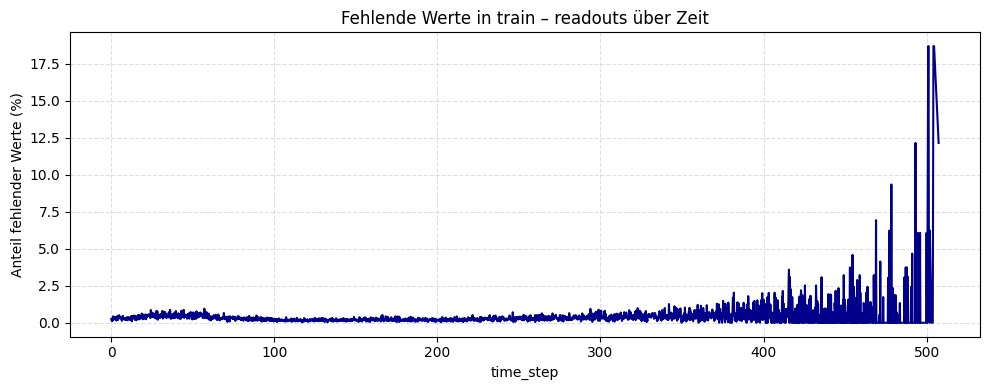

✅ Keine fehlenden Werte in 'train – tte'
✅ Keine fehlenden Werte in 'validation – spec'


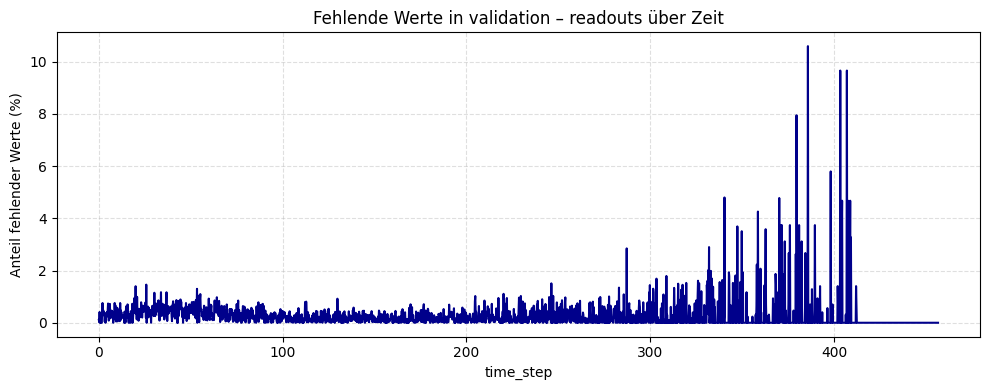

✅ Keine fehlenden Werte in 'validation – labels'
✅ Keine fehlenden Werte in 'test – spec'


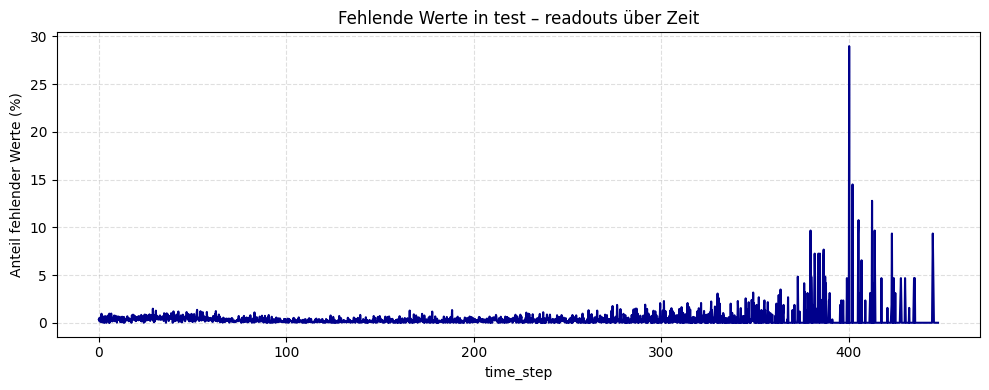

✅ Keine fehlenden Werte in 'test – labels'


In [59]:
plot_missing_value_trend_per_time(raw_data)

#### Fehlende Werte pro Spalte

In [78]:
def missing_value_table_per_column(raw_data: dict) -> pd.DataFrame:
    """
    Erstellt eine transponierte Tabelle mit dem prozentualen Anteil fehlender Werte pro Spalte und Split (train/val/test).
    Die Spaltennamen der Readouts werden zu Zeilen, die Splits zu Spalten.

    Args:
        raw_data (dict): Dictionary mit Schlüsseln wie 'train', 'val', 'test', die jeweils wiederum ein Dict enthalten
                         (z. B. mit 'readouts', 'spec', 'labels', etc.), wobei jeder Eintrag ein DataFrame ist.

    Returns:
        pd.DataFrame: Tabelle mit Zeilen = Spaltennamen, Spalten = Splits, Werte = % fehlender Werte.
    """
    result_rows = []

    for split_name, dataset in raw_data.items():
        readout_df = dataset.get("readouts")
        if readout_df is None:
            continue

        if not readout_df.isnull().values.any():
            continue

        missing_percent = readout_df.isnull().mean() * 100
        result_rows.append(missing_percent.rename(split_name))

    if not result_rows:
        return pd.DataFrame()

    return pd.concat(result_rows, axis=1)  # Spalten = Splits, Zeilen = Feature-Namen


In [81]:

pd.set_option("display.max_rows", None)  # Alle Zeilen anzeigen
pd.set_option("display.max_columns", None)  # Alle Spalten anzeigen

missing_value_table_per_column(raw_data)

,train,validation,test
vehicle_id,0.000000,0.000000,0.000000
time_step,0.000000,0.000000,0.000000
171_0,0.000000,0.000000,0.000000
666_0,0.003564,0.006115,0.004038
427_0,0.570626,0.644152,0.517311
837_0,0.003475,0.006625,0.003533
167_0,0.254977,0.252768,0.441102
167_1,0.254977,0.252768,0.441102
167_2,0.254977,0.252768,0.441102
167_3,0.254977,0.252768,0.441102


##### Zusammenfassung der Daten

In [76]:
def generate_readout_summary_table(raw_data: dict) -> pd.DataFrame:
    """
    Erstellt eine Zusammenfassungstabelle über die Readout-Daten in Train, Validation und Test.
    
    Args:
        raw_data (dict): Dictionary mit den Daten unter den Keys 'train', 'val', 'test', jeweils mit 'readouts'-DataFrames.
    
    Returns:
        pd.DataFrame: Übersichtstabelle mit Metriken pro Split.
    """
    results = []


    for split in raw_data.keys():
        df = raw_data[split]['readouts']

        num_vehicles = df['vehicle_id'].nunique()
        num_readouts = len(df)
        avg_readouts_per_vehicle = df.groupby('vehicle_id').size().mean()
        missing_values = df.isnull().sum().sum()
        total_values = df.size
        missing_percentage = missing_values / total_values * 100

        results.append({
            "#vehicles": num_vehicles,
            "#readouts": num_readouts,
            "#readouts per vehicle (average)": round(avg_readouts_per_vehicle),
            "#total values": total_values,
            "#missing values": missing_values,
            "%missing values": f"{missing_percentage:.5f}%"
        })

    # Statische Prozentwerte für Fahrzeuge (laut Paper)
    df_result = pd.DataFrame(results, index=["Train set", "Validation set", "Test set"]).T
    df_result.loc["%vehicles"] = ["70%", "15%", "15%"]
    df_result = df_result[["Train set", "Validation set", "Test set"]]

    return df_result


In [77]:
summary_df = generate_readout_summary_table(raw_data)

print("Readout Summary Table:")
display(summary_df)


Readout Summary Table:


,Train set,Validation set,Test set
#vehicles,23550,5046,5045
#readouts,1122452,196227,198140
#readouts per vehicle (average),48,39,39
#total values,120102364,20996289,21200980
#missing values,354634,60339,66403
%missing values,0.29528%,0.28738%,0.31321%
%vehicles,70%,15%,15%
